In [1]:
import pandas as pd
from sklearn.utils import resample

# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')


In [2]:
# Display the class distribution
print("Original class distribution:")
print(data['Revenue'].value_counts())


Original class distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [3]:
# Separate the majority and minority classes
df_majority = data[data.Revenue == False]
df_minority = data[data.Revenue == True]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority), # to match minority class
                                    random_state=42) # reproducible results

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the dataframe to mix the undersampled data
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("\nNew class distribution:")
print(df_undersampled['Revenue'].value_counts())



New class distribution:
Revenue
False    1908
True     1908
Name: count, dtype: int64


In [4]:
# Save the undersampled dataset to a new CSV file
df_undersampled.to_csv('online_shoppers_intention_undersampled.csv', index=False)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2, RFE

In [6]:
# Loading the dataset
df = pd.read_csv('online_shoppers_intention_undersampled.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3,101.000000,0,0.000000,17,300.666667,0.000000,0.012500,0.000000,0.0,May,1,8,1,2,New_Visitor,False,False
1,6,96.857143,0,0.000000,28,672.545238,0.000000,0.020707,19.714689,0.0,Mar,1,1,2,10,Returning_Visitor,False,True
2,4,176.913333,1,40.800000,72,1548.194444,0.000000,0.007888,1.891943,0.0,Aug,2,4,3,5,Returning_Visitor,False,True
3,2,152.833333,0,0.000000,20,791.666667,0.011111,0.016667,41.350072,0.0,Mar,1,1,1,2,New_Visitor,False,True
4,2,27.583333,0,0.000000,22,420.200000,0.008696,0.015162,0.000000,0.0,May,3,2,1,4,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,2,51.500000,2,99.500000,15,771.875000,0.010000,0.026667,15.395347,0.0,Dec,2,2,3,2,Returning_Visitor,False,False
3812,3,29.000000,0,0.000000,2,11.000000,0.075000,0.075000,0.000000,0.0,Dec,1,1,4,8,Returning_Visitor,False,False
3813,0,0.000000,0,0.000000,7,330.166667,0.000000,0.021429,0.000000,0.0,Dec,3,2,9,2,Returning_Visitor,False,False
3814,0,0.000000,0,0.000000,13,541.916667,0.000000,0.015385,26.099954,0.0,Dec,2,4,1,2,New_Visitor,False,True


In [7]:
#Summary of the DataFrame, including the index dtype, column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           3816 non-null   int64  
 1   Administrative_Duration  3816 non-null   float64
 2   Informational            3816 non-null   int64  
 3   Informational_Duration   3816 non-null   float64
 4   ProductRelated           3816 non-null   int64  
 5   ProductRelated_Duration  3816 non-null   float64
 6   BounceRates              3816 non-null   float64
 7   ExitRates                3816 non-null   float64
 8   PageValues               3816 non-null   float64
 9   SpecialDay               3816 non-null   float64
 10  Month                    3816 non-null   object 
 11  OperatingSystems         3816 non-null   int64  
 12  Browser                  3816 non-null   int64  
 13  Region                   3816 non-null   int64  
 14  TrafficType             

In [8]:
# Displaying the first few rows of the dataset
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               3               101.000000              0   
1               6                96.857143              0   
2               4               176.913333              1   
3               2               152.833333              0   
4               2                27.583333              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0              17               300.666667   
1                     0.0              28               672.545238   
2                    40.8              72              1548.194444   
3                     0.0              20               791.666667   
4                     0.0              22               420.200000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.012500    0.000000         0.0   May                 1   
1     0.000000   0.020707   19.714689         0.0   Mar   

In [9]:
# Displaying the last few rows of the dataset
print(df.tail())

      Administrative  Administrative_Duration  Informational  \
3811               2                51.500000              2   
3812               3                29.000000              0   
3813               0                 0.000000              0   
3814               0                 0.000000              0   
3815              22               474.476412              3   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
3811               99.500000              15               771.875000   
3812                0.000000               2                11.000000   
3813                0.000000               7               330.166667   
3814                0.000000              13               541.916667   
3815              167.142857              92              2324.820965   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
3811     0.010000   0.026667   15.395347         0.0   Dec                 2   
3812     0.07500

In [10]:
df.shape

(3816, 18)

### EDA

In [11]:
# Check for null values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no null values in the dataset

In [12]:
# Check for duplicate row
df.duplicated().sum()

6

In [13]:
# Check the datatypes
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [14]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [15]:
# Identify categorical columns
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
categorical_features

Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [16]:
# Perform descriptive statistics
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816,3816.000000,3816.000000,3816.000000,3816.000000,3816,3816,3816
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nov,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1173,NaN,NaN,NaN,NaN,3104,2891,1908
mean,2.764151,96.043648,0.613732,42.839466,37.868187,1445.015299,0.015112,0.033643,14.603190,0.048270,NaN,2.114256,2.408019,3.129193,3.978774,NaN,NaN,NaN
std,3.496478,183.482894,1.380319,146.496629,49.464012,1982.852566,0.039090,0.040651,28.528079,0.180016,NaN,0.914451,1.795415,2.389761,3.895869,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,10.000000,289.541667,0.000000,0.011765,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,29.000000,0.000000,0.000000,22.000000,783.470833,0.000815,0.020739,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,115.000000,1.000000,0.000000,45.000000,1783.566667,0.011111,0.036665,18.677150,0.000000,NaN,2.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


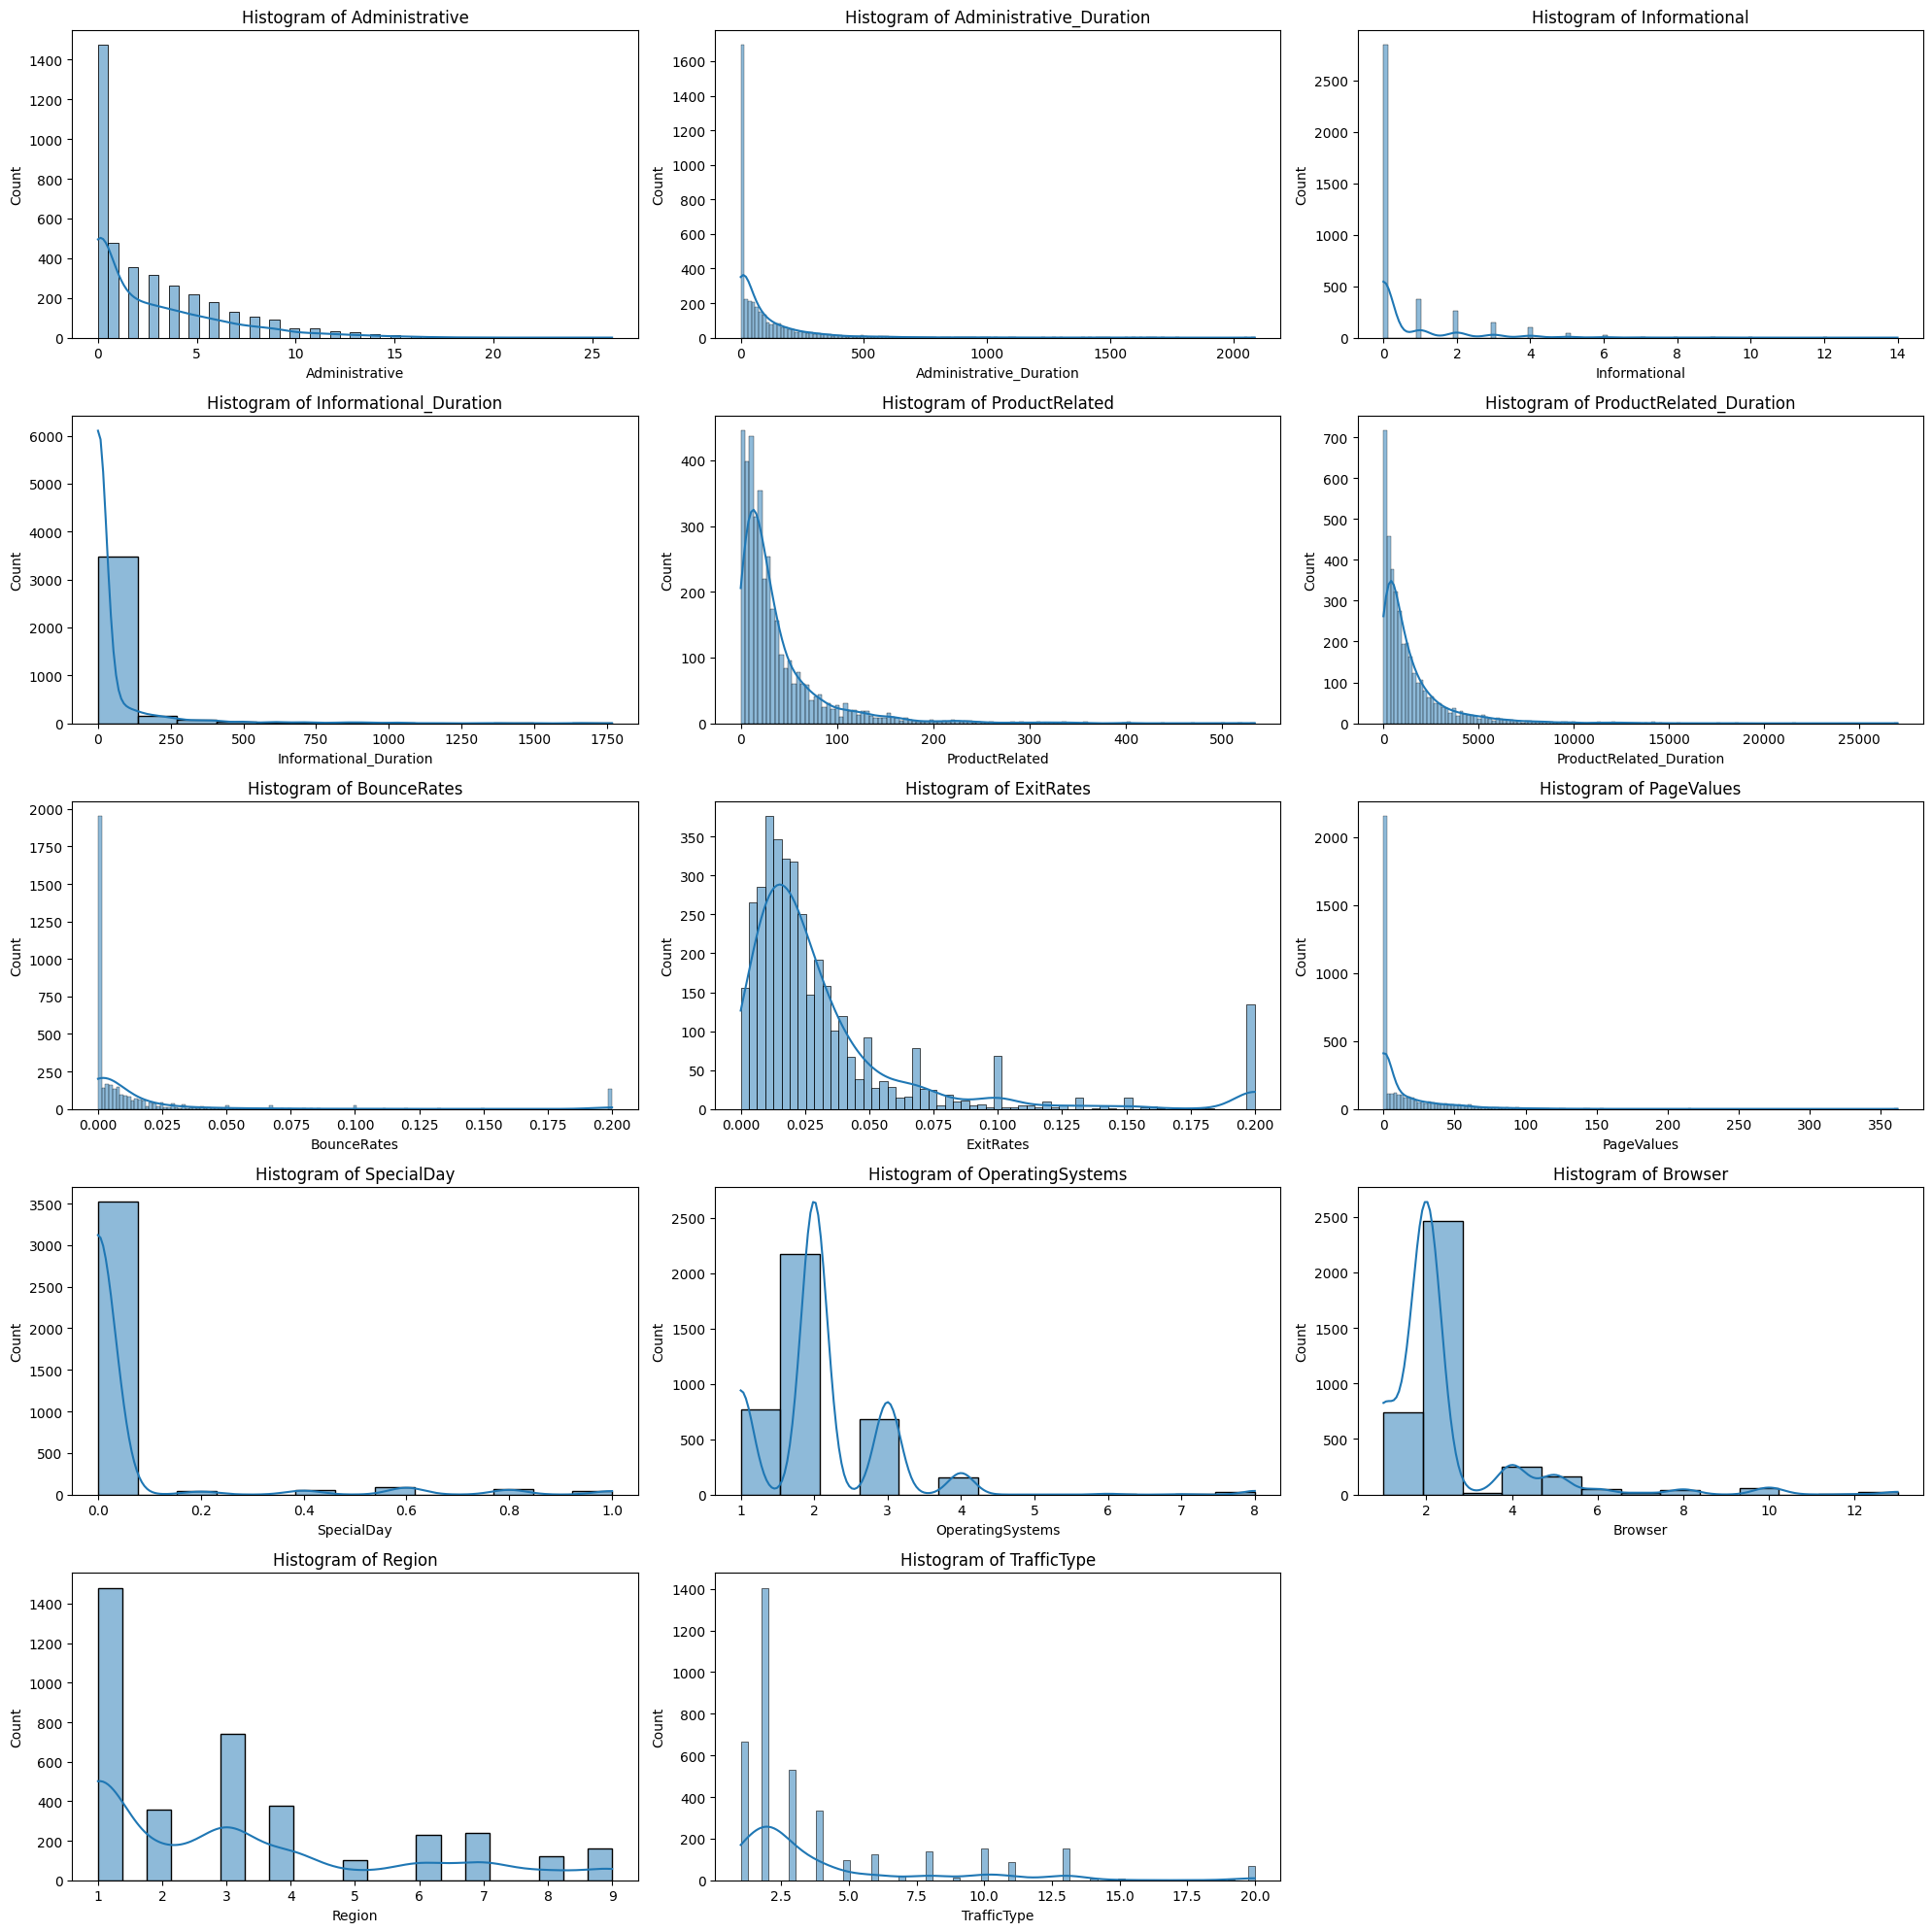

In [17]:
# Histograms for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()

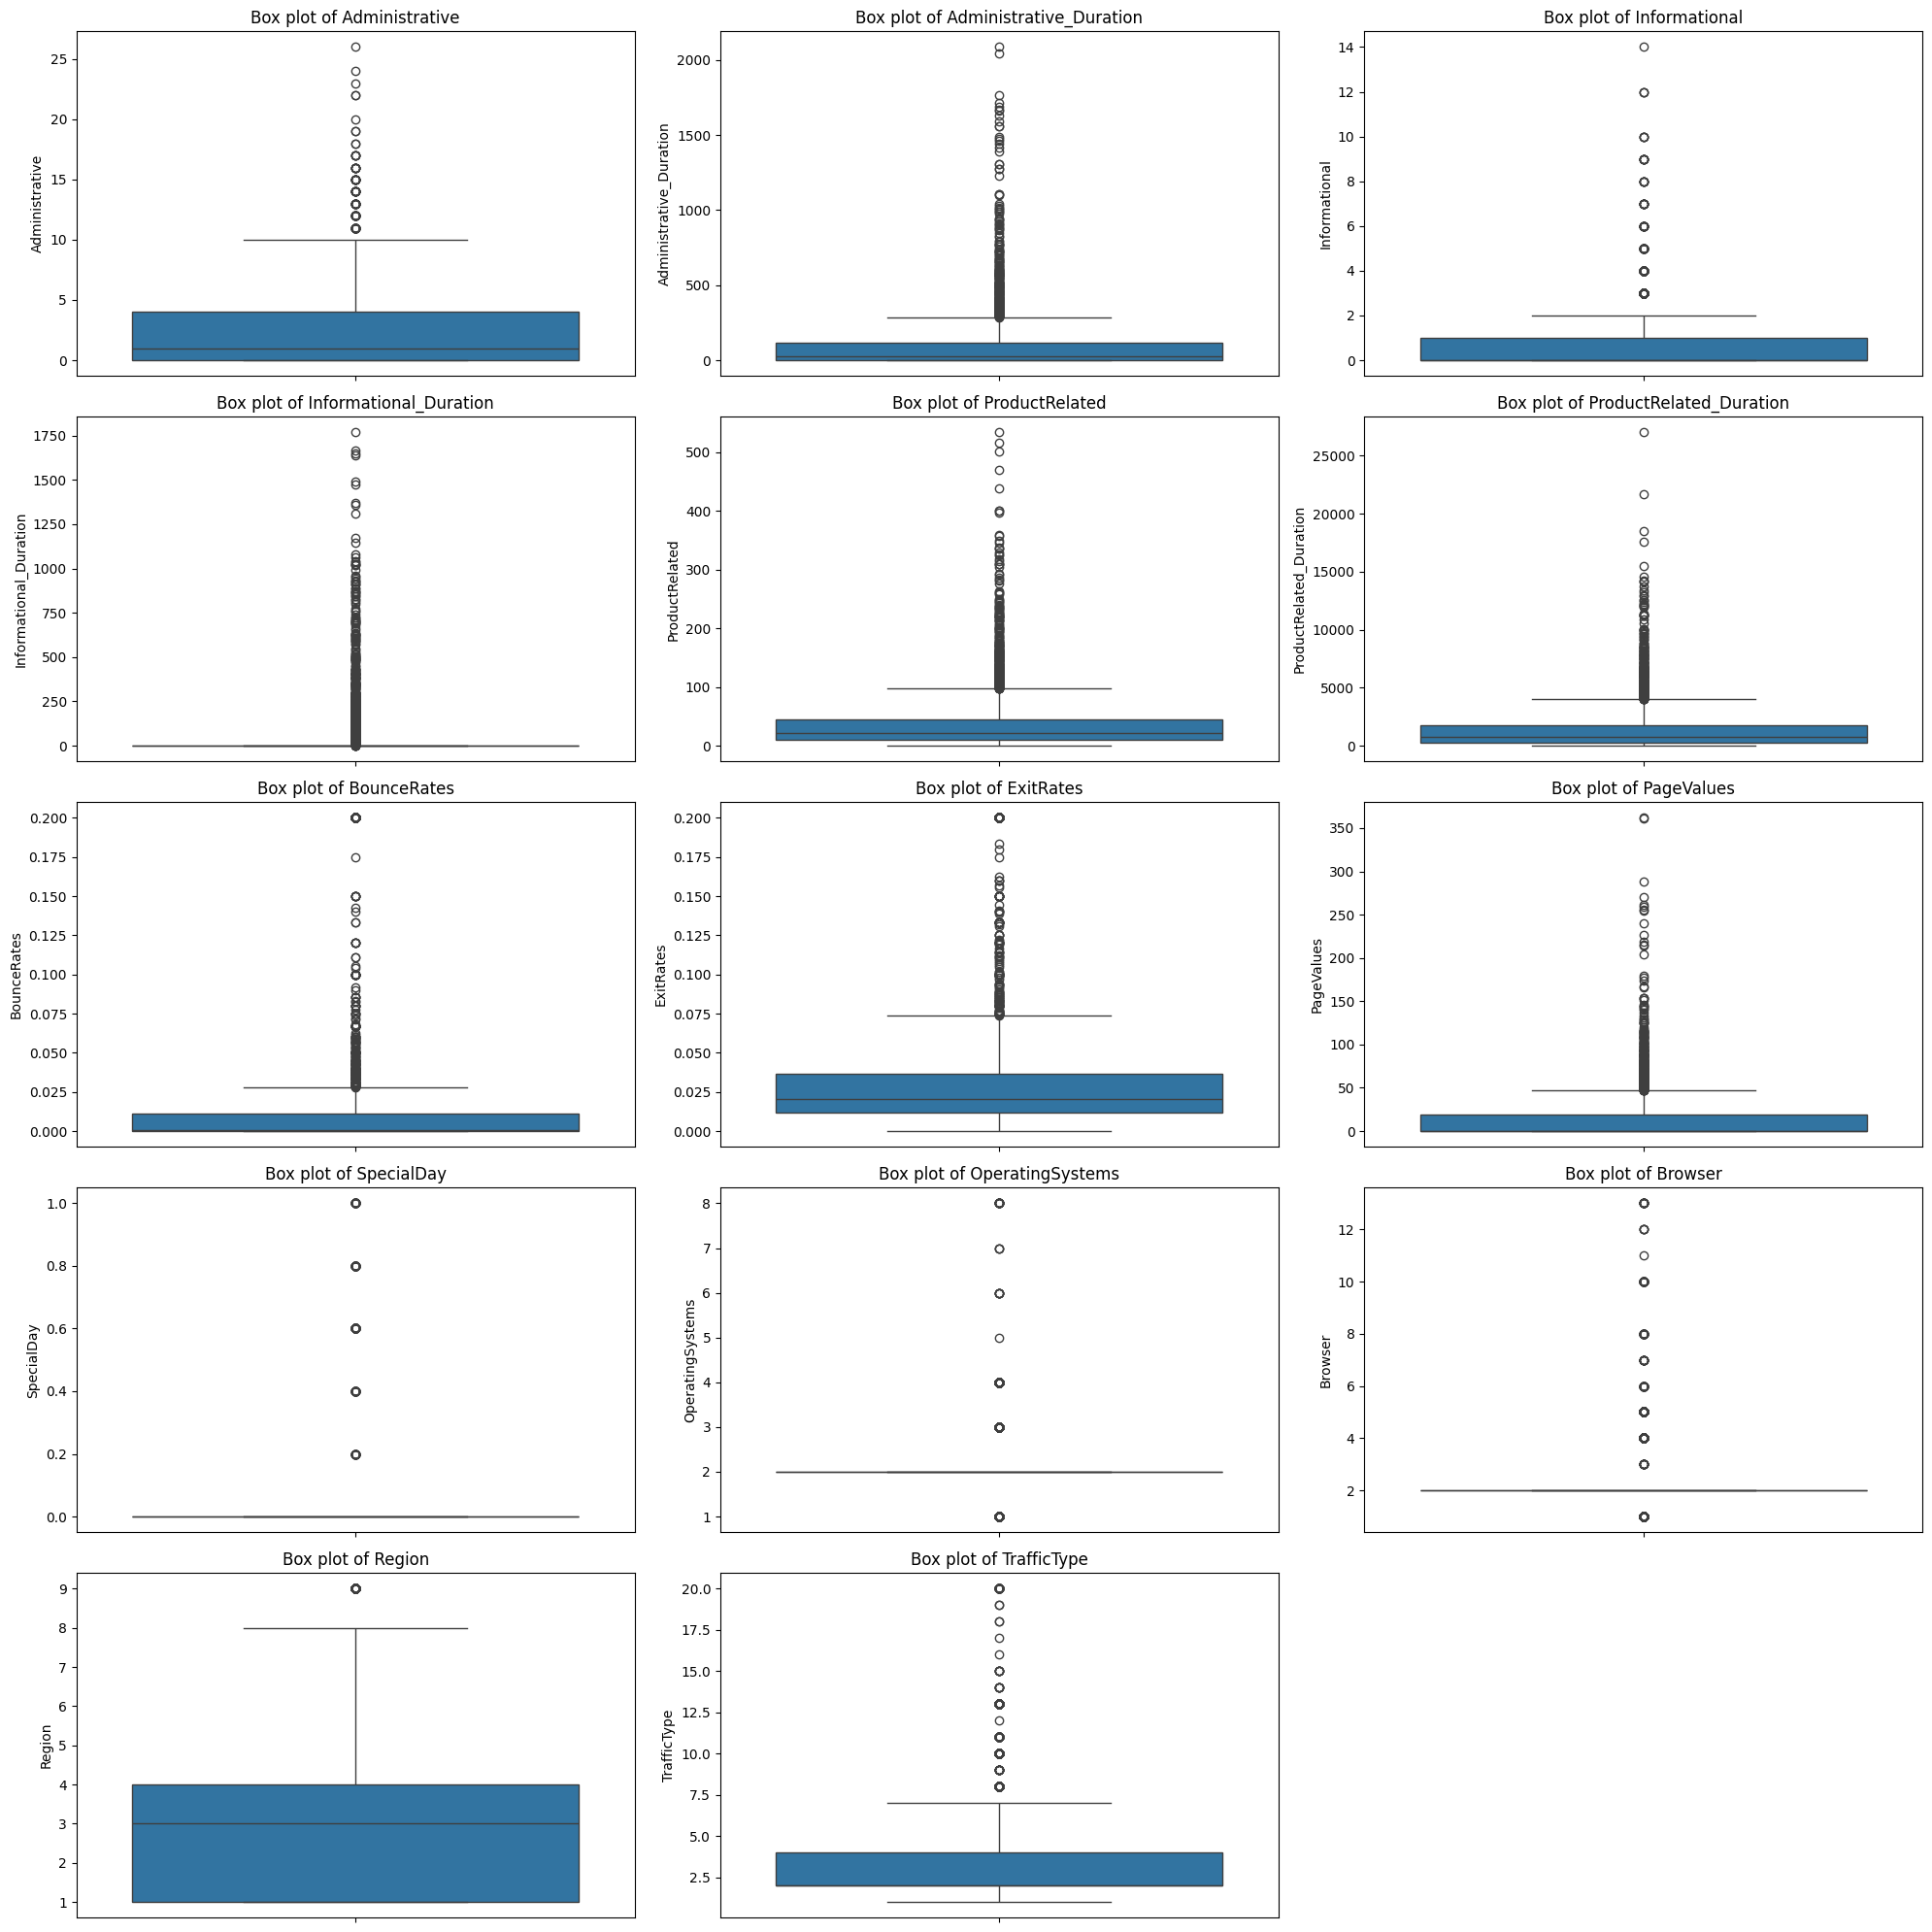

In [18]:
# Box plots for numerical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()

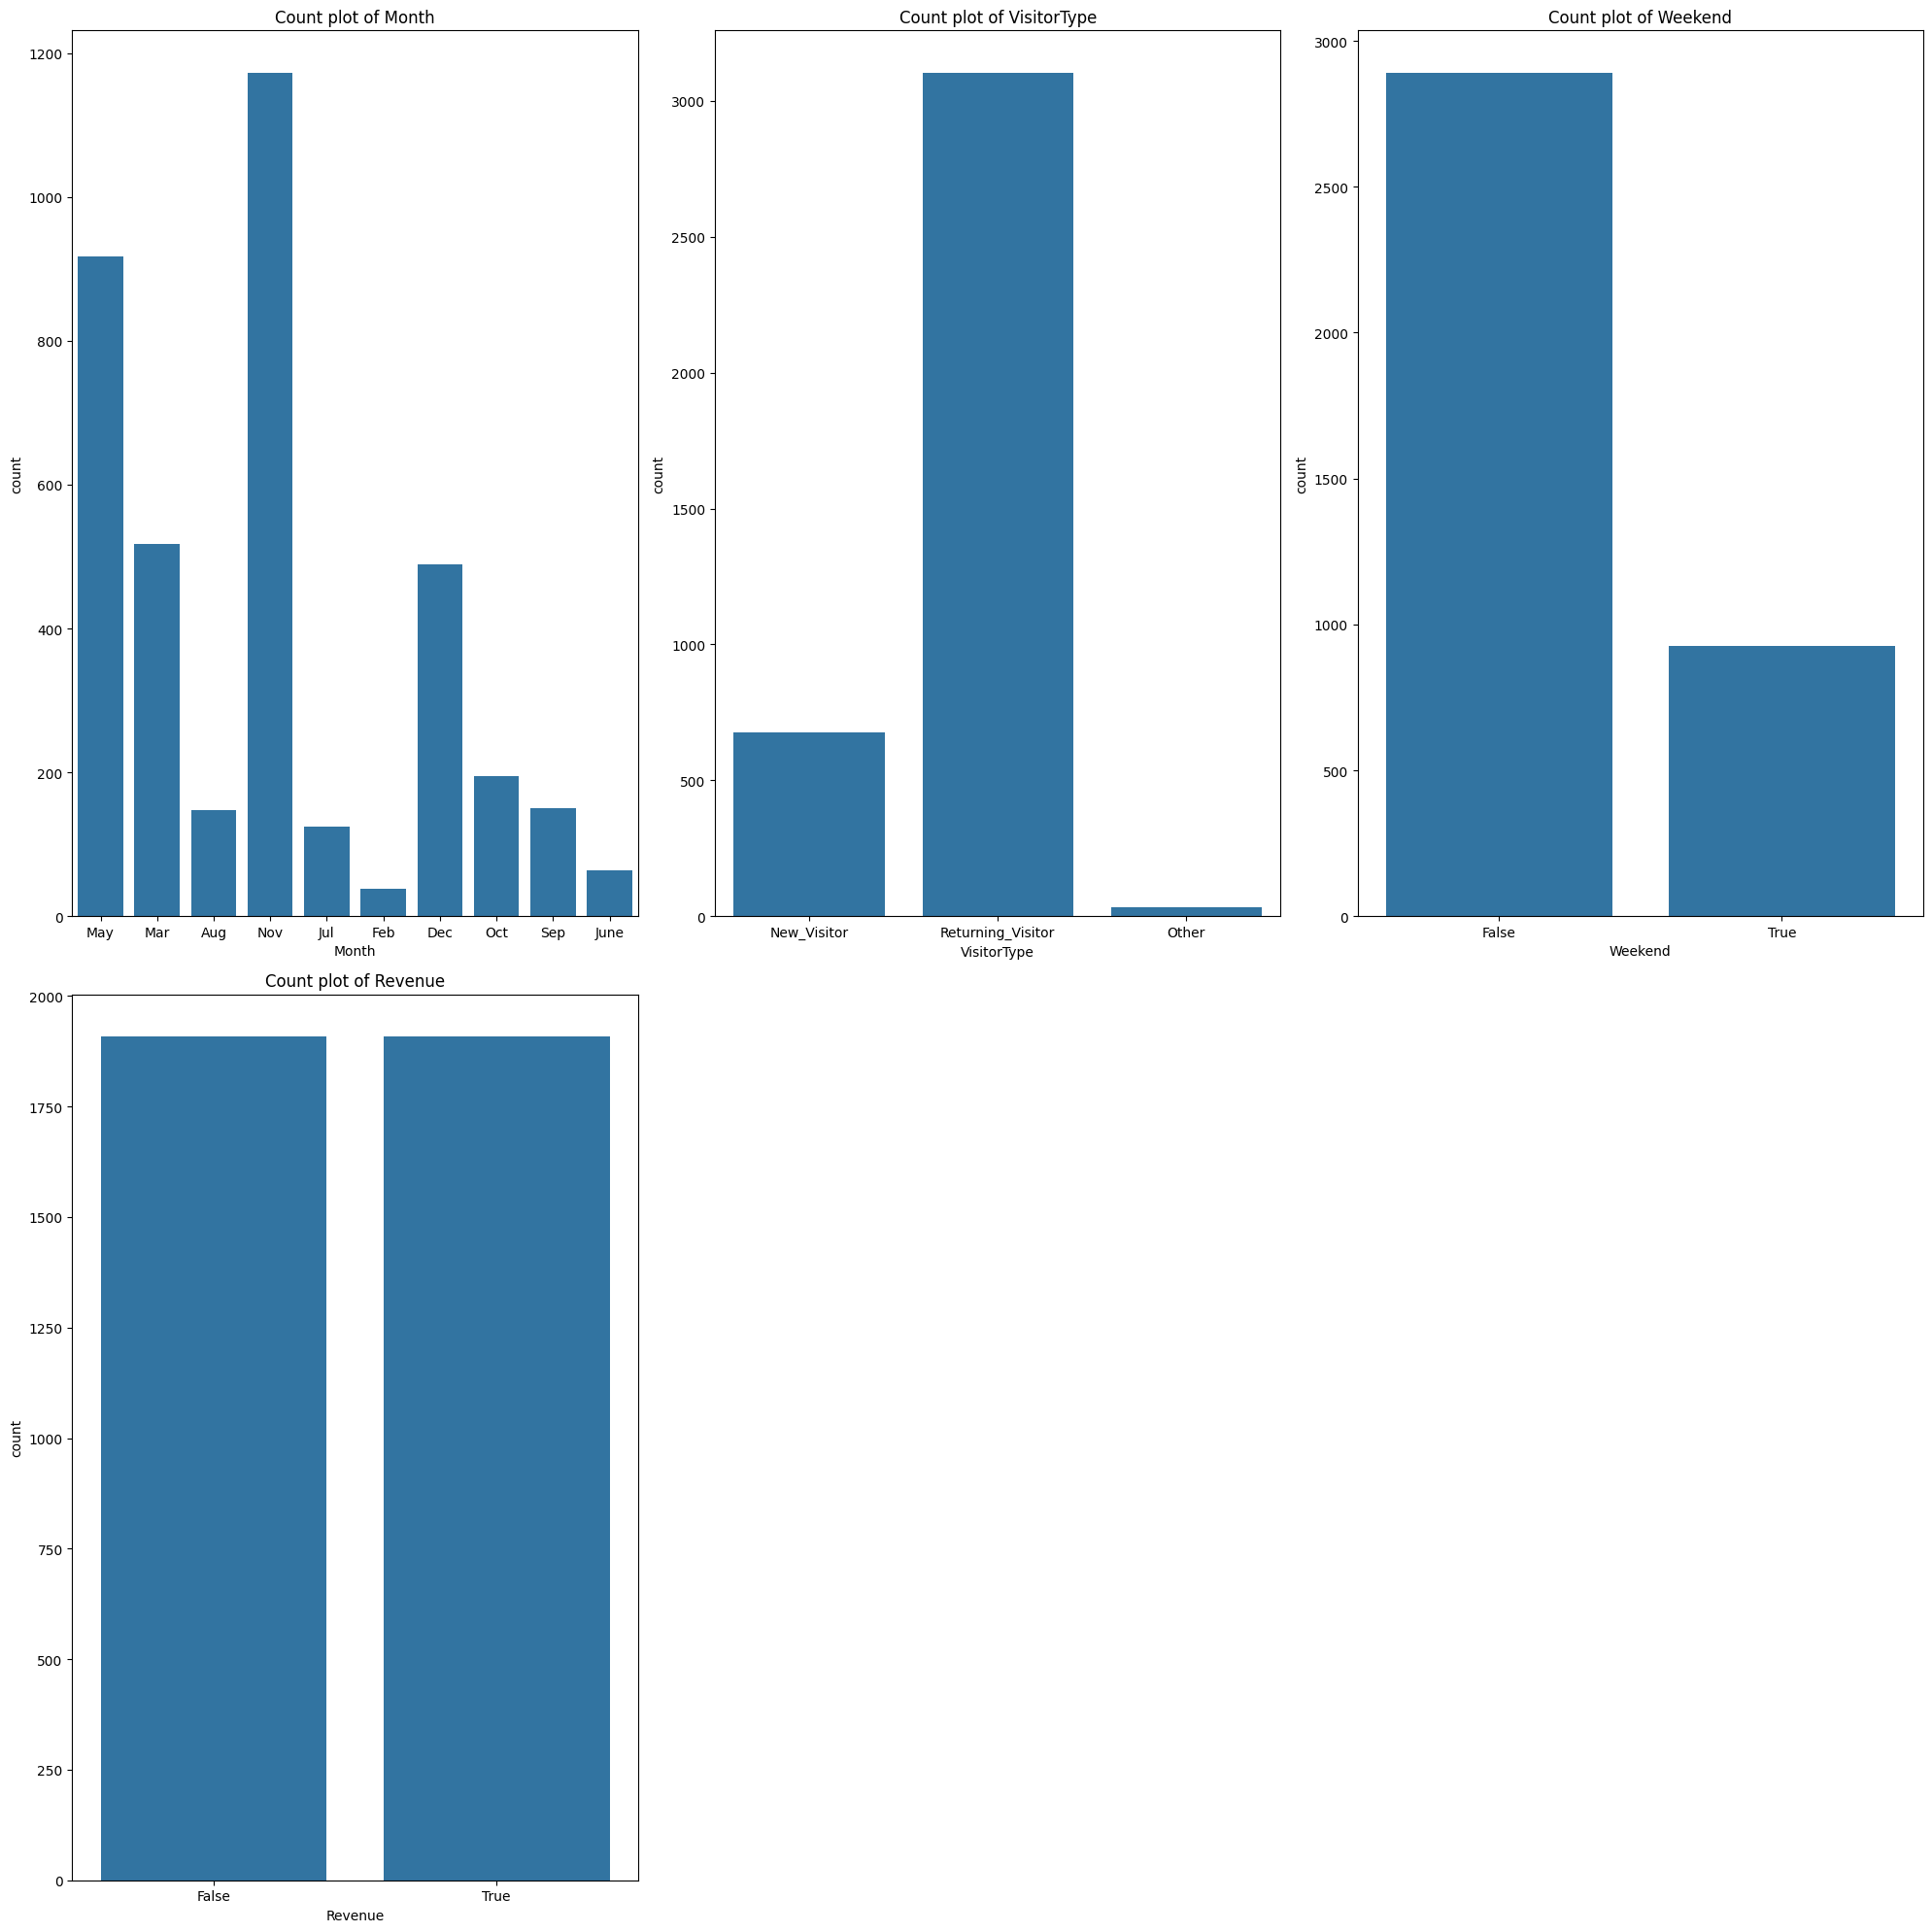

In [19]:
# Count plots for categorical features
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features)//3 + 1, 3, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count plot of {feature}')
plt.tight_layout()

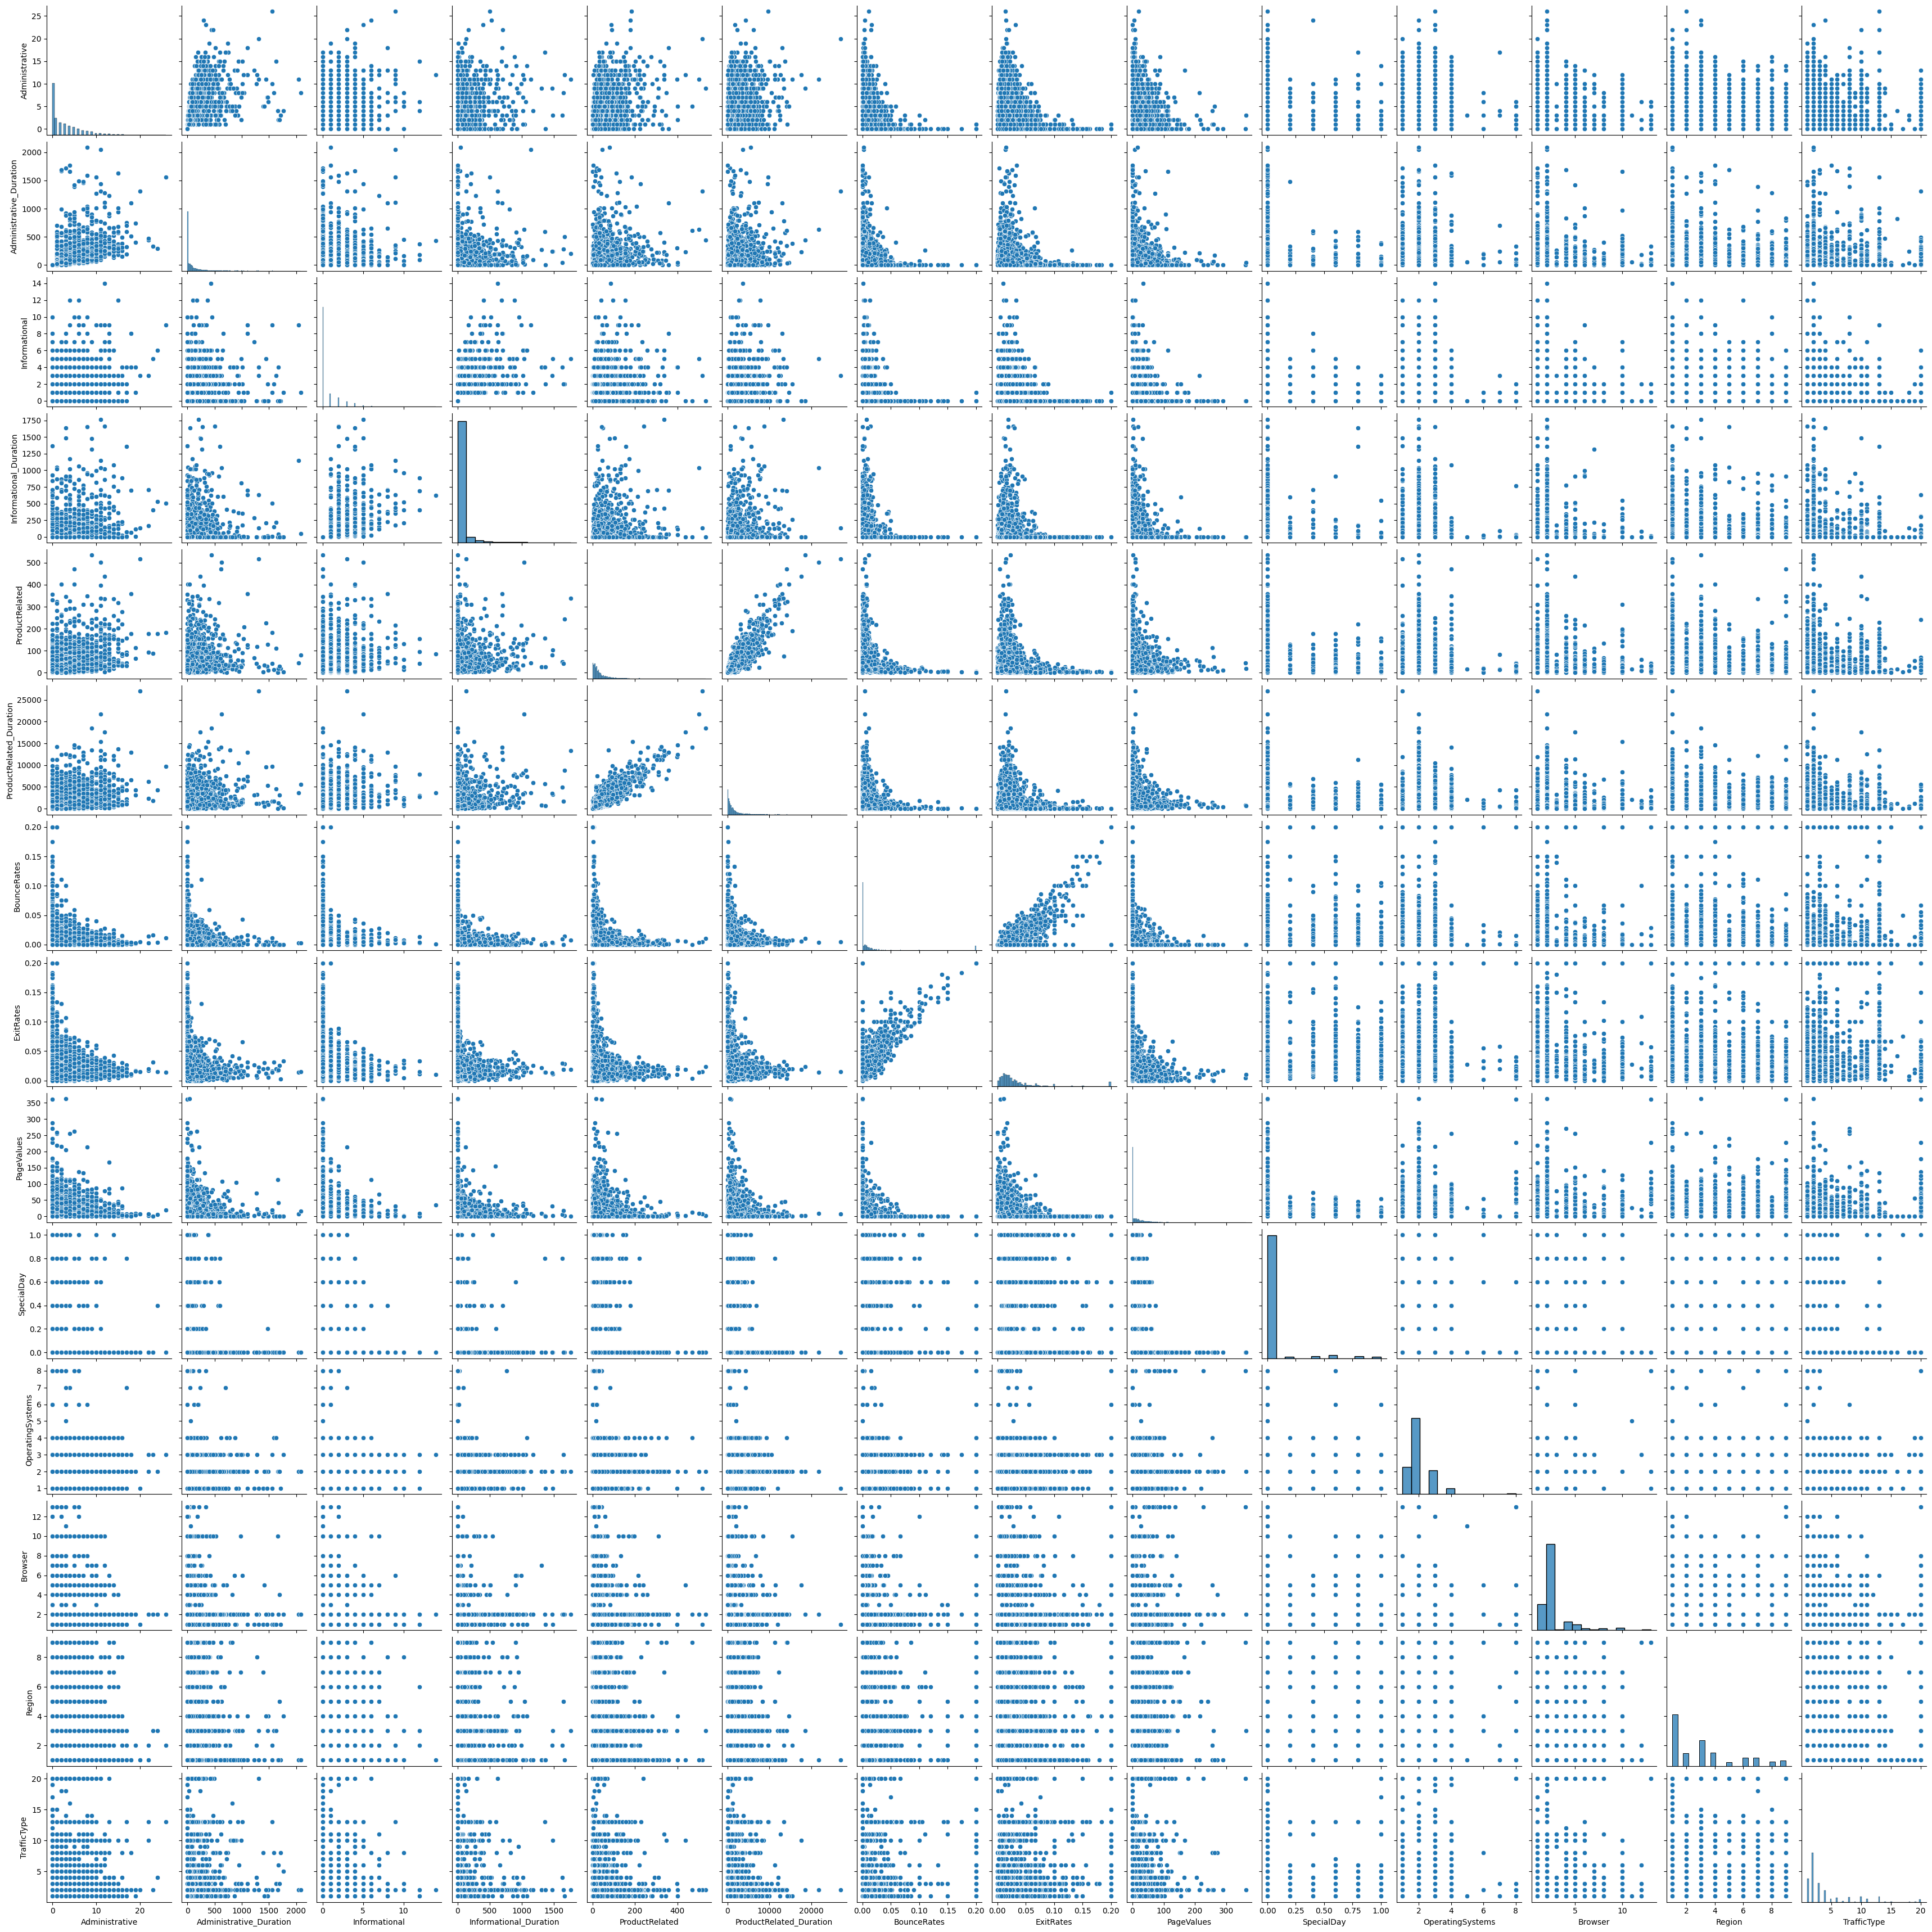

In [20]:
# Scatter plot matrix to visualize relationships between numerical features
sns.pairplot(df[numerical_features])

Text(0.5, 1.0, 'Correlation Matrix')

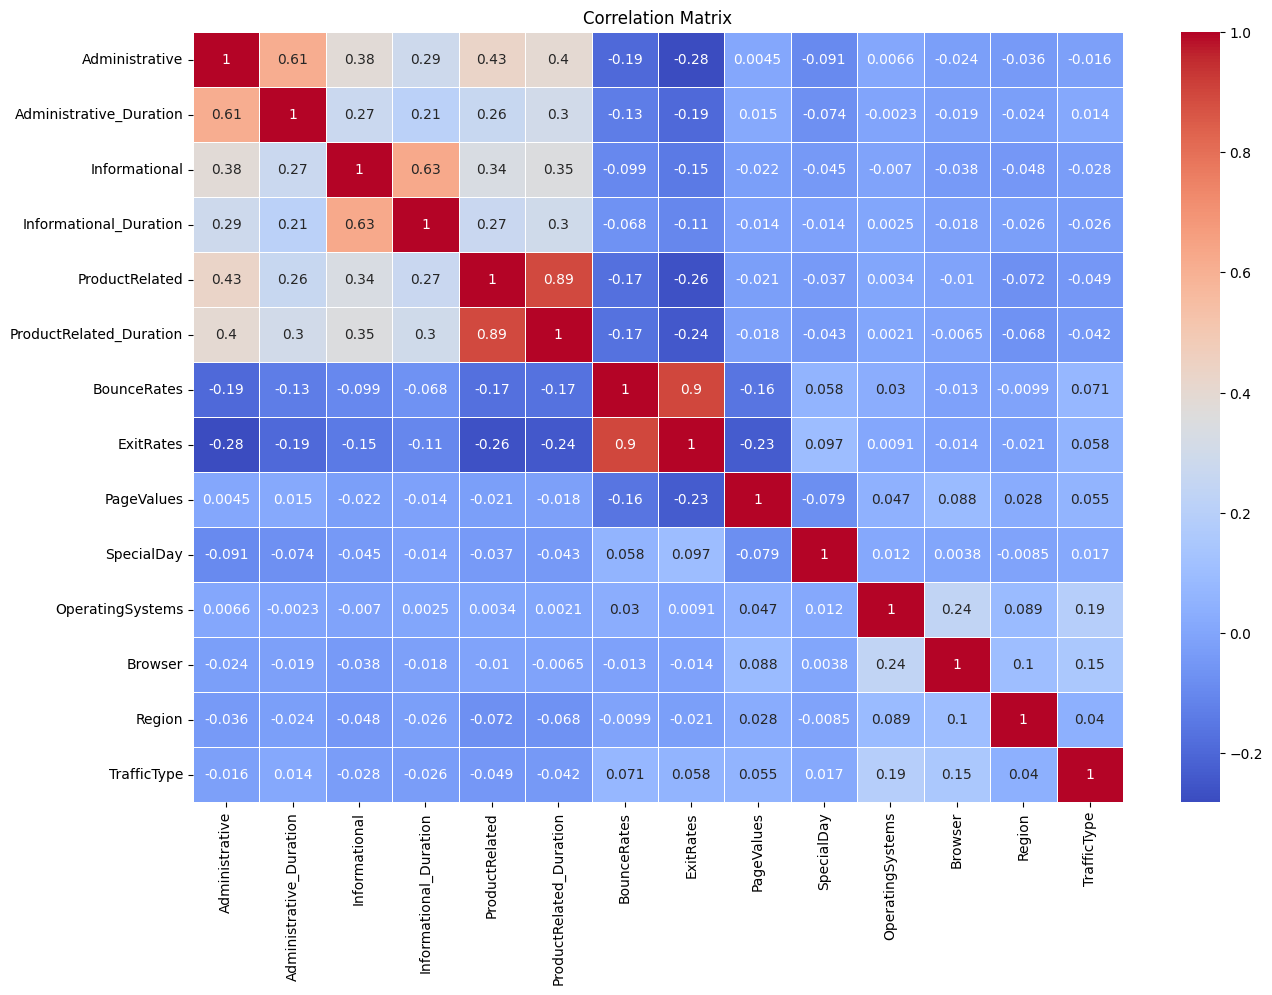

In [21]:
# Correlation matrix
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [22]:
# Skewness 
print("\nSkewness of numerical features:")
print(df[numerical_features].skew())


Skewness of numerical features:
Administrative             1.661826
Administrative_Duration    4.438226
Informational              3.282368
Informational_Duration     5.665713
ProductRelated             3.560044
ProductRelated_Duration    3.546985
BounceRates                3.930551
ExitRates                  2.795778
PageValues                 4.092663
SpecialDay                 3.876905
OperatingSystems           2.299525
Browser                    3.180664
Region                     1.003599
TrafficType                2.103571
dtype: float64


In [23]:
# Kurtosis
print("\nKurtosis of numerical features:")
print(df[numerical_features].kurtosis())


Kurtosis of numerical features:
Administrative              3.283838
Administrative_Duration    28.418125
Informational              14.504939
Informational_Duration     40.370000
ProductRelated             18.971446
ProductRelated_Duration    20.788776
BounceRates                15.190723
ExitRates                   8.086717
PageValues                 27.684234
SpecialDay                 14.319713
OperatingSystems           11.702013
Browser                    12.005953
Region                     -0.085510
TrafficType                 4.384237
dtype: float64


### Data Preprocessing

In [24]:
# Check for missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [25]:
# Check for duplicates
df.duplicated().sum()

6

In [26]:
# Remove duplicates
df=df.drop_duplicates()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3,101.000000,0,0.000000,17,300.666667,0.000000,0.012500,0.000000,0.0,May,1,8,1,2,New_Visitor,False,False
1,6,96.857143,0,0.000000,28,672.545238,0.000000,0.020707,19.714689,0.0,Mar,1,1,2,10,Returning_Visitor,False,True
2,4,176.913333,1,40.800000,72,1548.194444,0.000000,0.007888,1.891943,0.0,Aug,2,4,3,5,Returning_Visitor,False,True
3,2,152.833333,0,0.000000,20,791.666667,0.011111,0.016667,41.350072,0.0,Mar,1,1,1,2,New_Visitor,False,True
4,2,27.583333,0,0.000000,22,420.200000,0.008696,0.015162,0.000000,0.0,May,3,2,1,4,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,2,51.500000,2,99.500000,15,771.875000,0.010000,0.026667,15.395347,0.0,Dec,2,2,3,2,Returning_Visitor,False,False
3812,3,29.000000,0,0.000000,2,11.000000,0.075000,0.075000,0.000000,0.0,Dec,1,1,4,8,Returning_Visitor,False,False
3813,0,0.000000,0,0.000000,7,330.166667,0.000000,0.021429,0.000000,0.0,Dec,3,2,9,2,Returning_Visitor,False,False
3814,0,0.000000,0,0.000000,13,541.916667,0.000000,0.015385,26.099954,0.0,Dec,2,4,1,2,New_Visitor,False,True


#### Outlier Detection And Treatment

In [27]:
# Define the whisker function
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

In [28]:
# Iterate over each numerical feature to find and handle outliers
for feature in numerical_features:
    lw, uw = whisker(df[feature])
    
    # Cap the outliers
    df[feature] = np.where(df[feature] < lw, lw, df[feature])
    df[feature] = np.where(df[feature] > uw, uw, df[feature])

C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3473586354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where(df[feature] < lw, lw, df[feature])
C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3473586354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.where(df[feature] > uw, uw, df[feature])


In [29]:
# Check the first few rows of the dataset after outlier handling
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0             3.0               101.000000            0.0   
1             6.0                96.857143            0.0   
2             4.0               176.913333            1.0   
3             2.0               152.833333            0.0   
4             2.0                27.583333            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0            17.0               300.666667   
1                     0.0            28.0               672.545238   
2                     0.0            72.0              1548.194444   
3                     0.0            20.0               791.666667   
4                     0.0            22.0               420.200000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.000000   0.012500    0.000000         0.0   May               2.0   
1     0.000000   0.020707   19.714689         0.0   Mar   

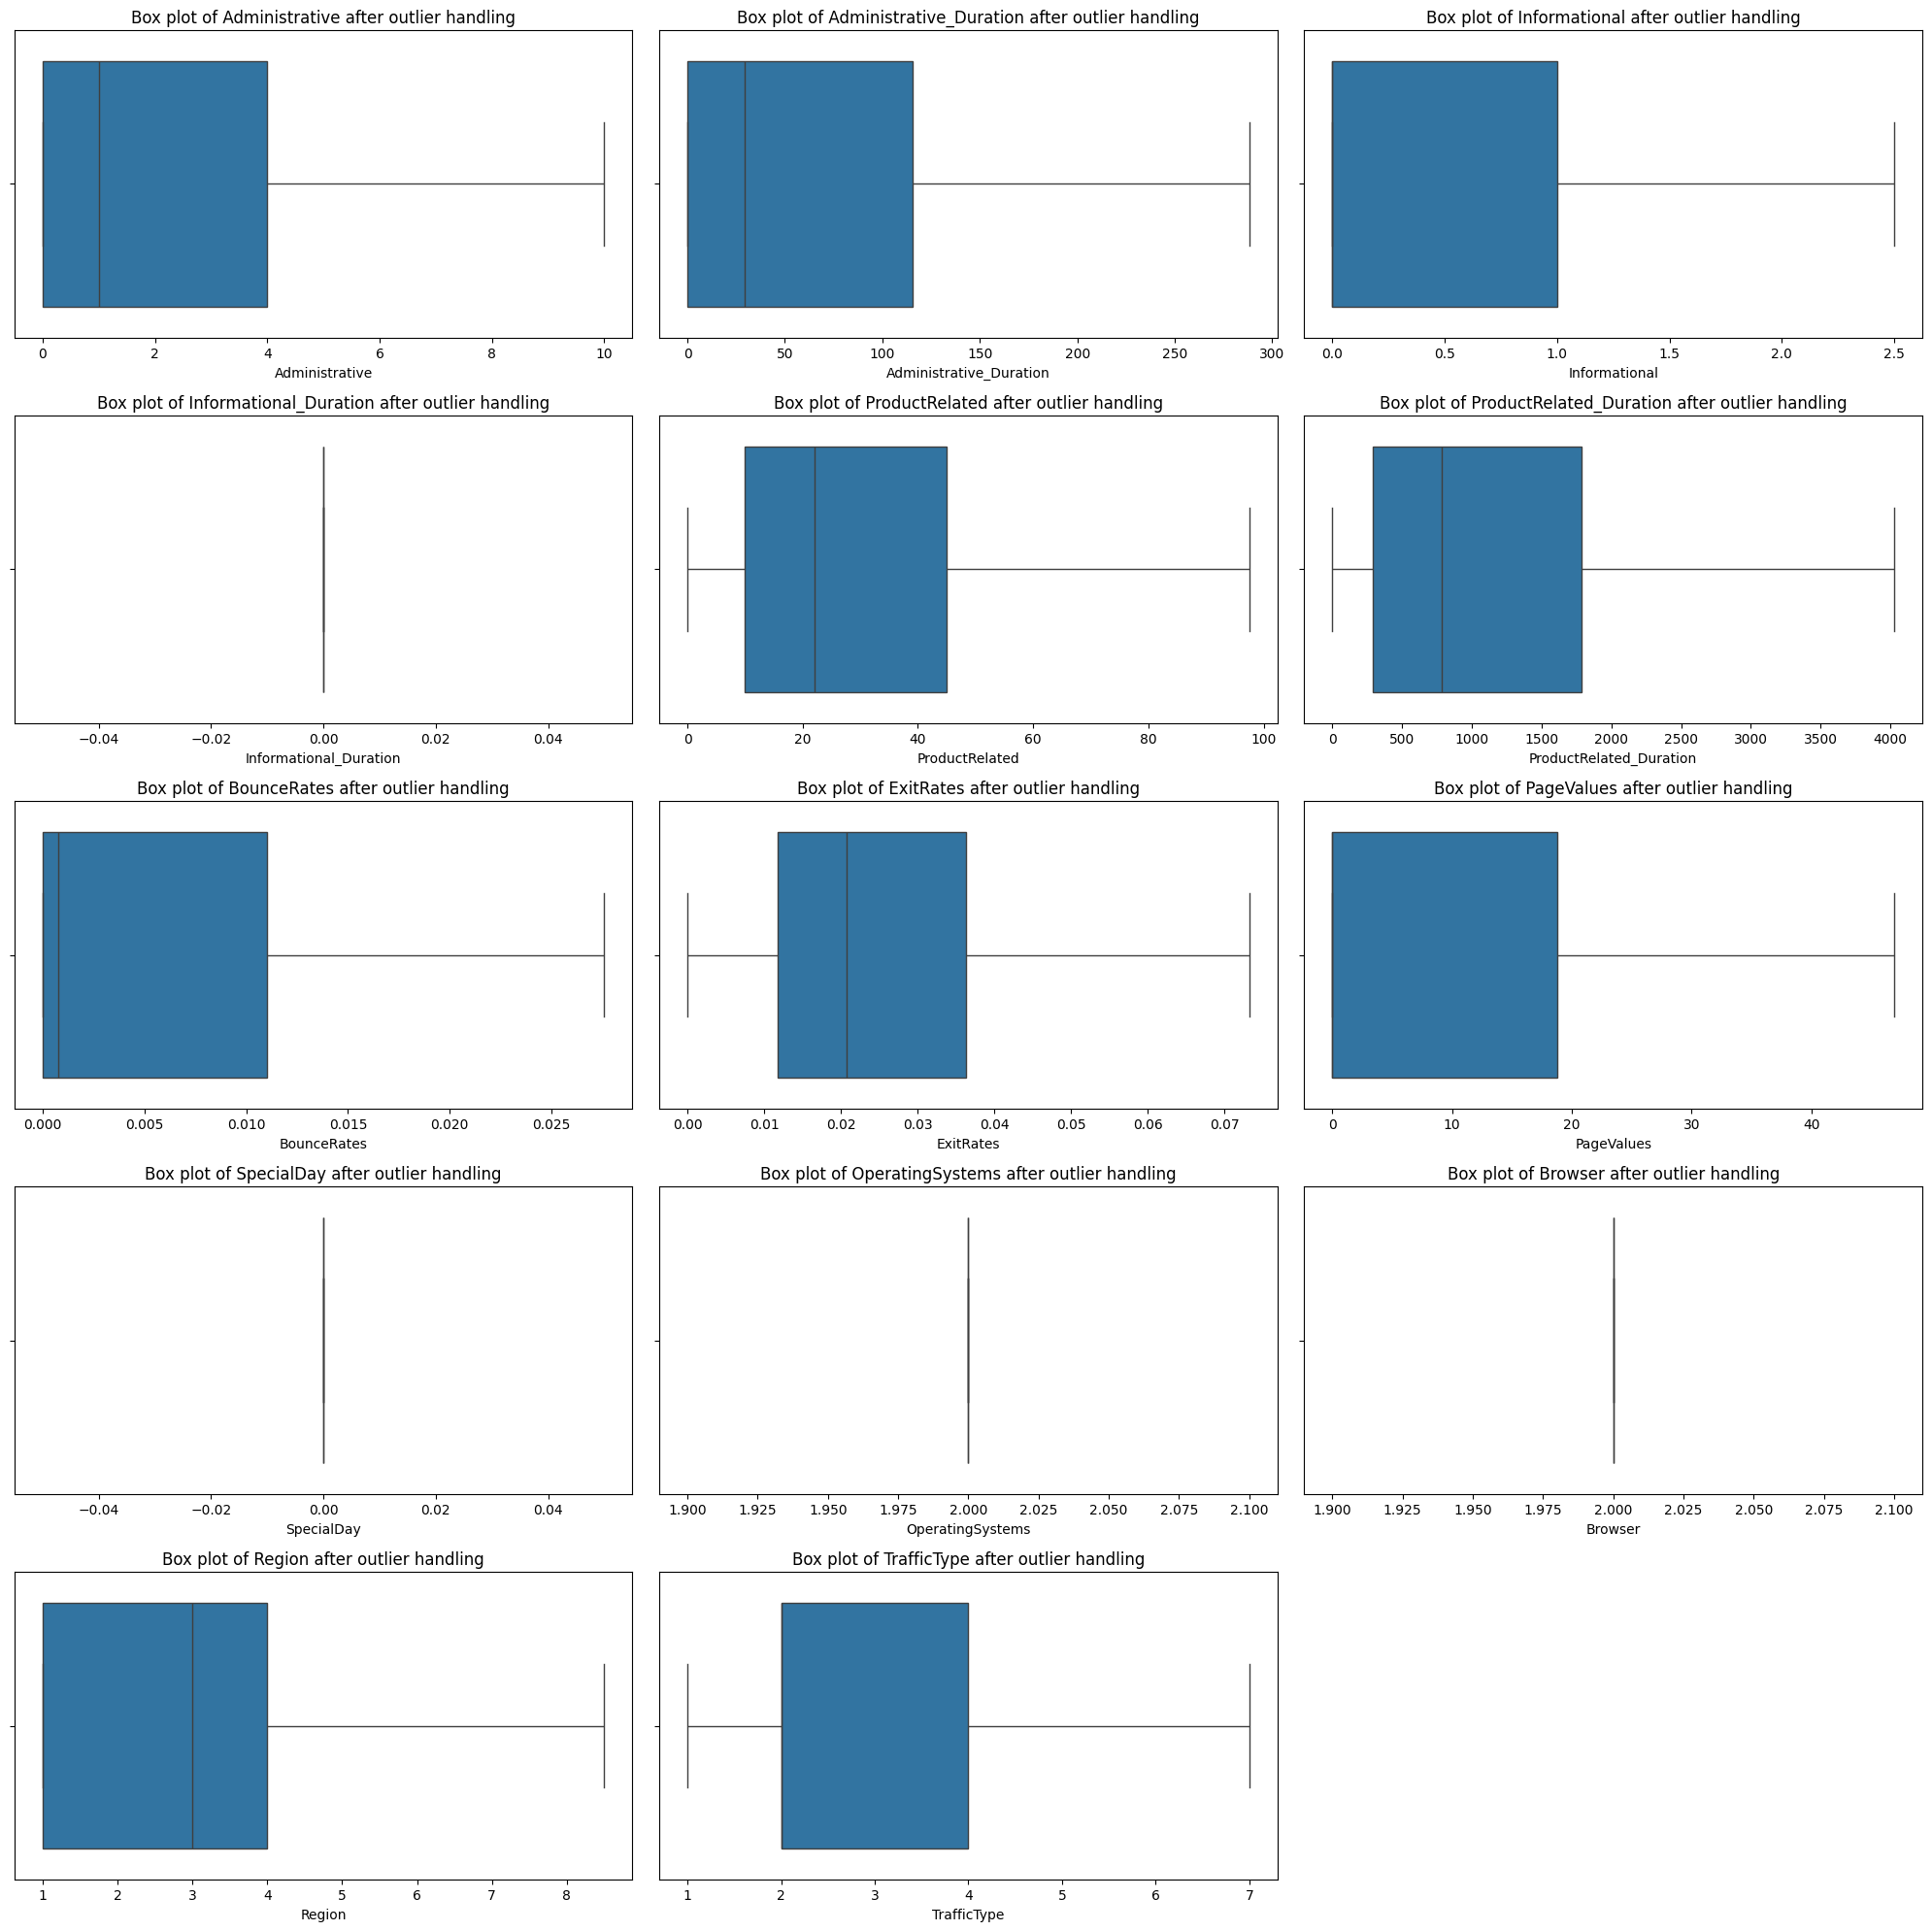

In [30]:
# Visualize the distribution of numerical features after outlier handling
plt.figure(figsize=(20, 20))
for i,feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features)//3 + 1, 3, i+1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature} after outlier handling')
    plt.tight_layout()

In [31]:
df.shape

(3810, 18)

In [32]:
from scipy.stats import skew
def apply_transformations(df, features):
    transformed_data = df.copy()
    for feature in features:
        if skew(df[feature]) > 0.5:
            transformed_data[feature + '_sqrt'] = np.sqrt(df[feature] + 1)
            transformed_data[feature + '_log'] = np.log1p(df[feature])
    return transformed_data

In [33]:
# Apply transformations
transformed_df = apply_transformations(df, numerical_features)

C:\Users\hp\AppData\Local\Temp\ipykernel_17380\108429309.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(df[feature]) > 0.5:


In [34]:
# Initialize an empty list to store skewness values
skewness_data = []

# Check skewness for each feature and its transformations
for feature in numerical_features:
    original_skewness = skew(df[feature])
    if original_skewness > 0.5:
        skewness_sqrt = skew(transformed_df[feature + '_sqrt'])
        skewness_log = skew(transformed_df[feature + '_log'])
        skewness_data.append({
            'Feature': feature,
            'Original_Skewness': original_skewness,
            'Skewness_Sqrt': skewness_sqrt,
            'Skewness_Log': skewness_log
        })

# Create a DataFrame from the skewness data
skewness_df = pd.DataFrame(skewness_data)

# Display the DataFrame
print(skewness_df)


                   Feature  Original_Skewness  Skewness_Sqrt  Skewness_Log
0           Administrative           1.052695       0.627648      0.244670
1  Administrative_Duration           1.209726       0.565052     -0.101855
2            Informational           1.572583       1.460488      1.362524
3           ProductRelated           1.098561       0.488380     -0.419188
4  ProductRelated_Duration           1.137667       0.364914     -1.745038
5              BounceRates           1.225341       1.221494      1.217649
6                ExitRates           1.028910       1.014742      1.000529
7               PageValues           1.242487       0.851743      0.491599
8                   Region           0.940008       0.642679      0.361293
9              TrafficType           0.883799       0.656843      0.377709


C:\Users\hp\AppData\Local\Temp\ipykernel_17380\1039499617.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  original_skewness = skew(df[feature])


C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3615675632.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(df[feature]) > 0.5:


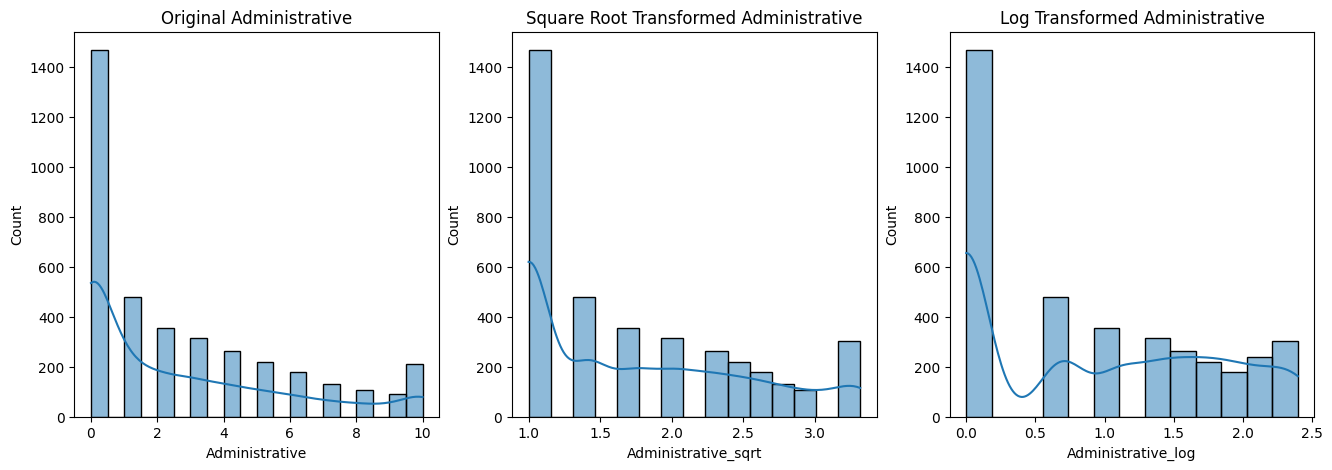

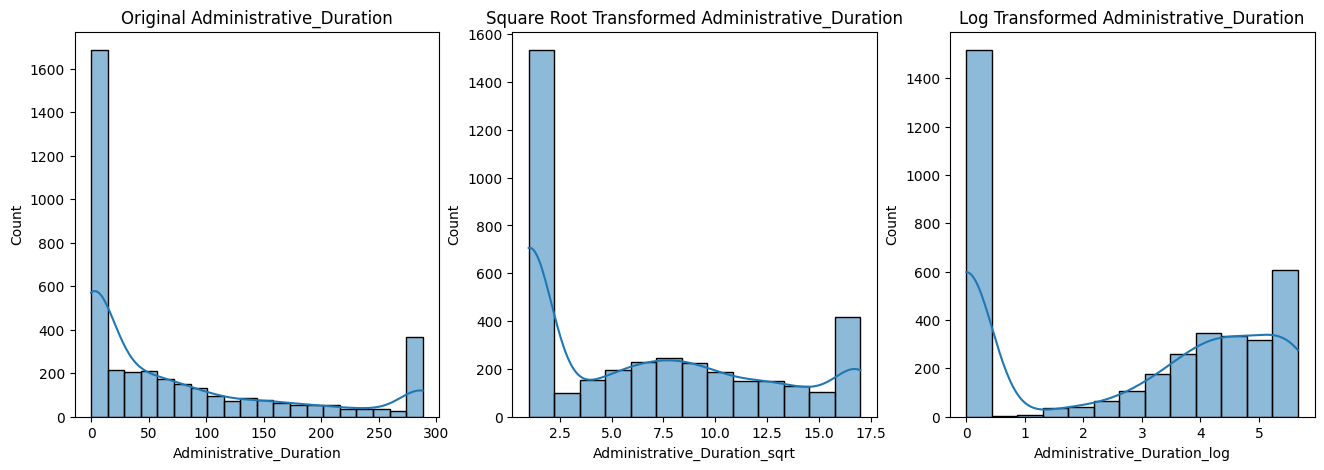

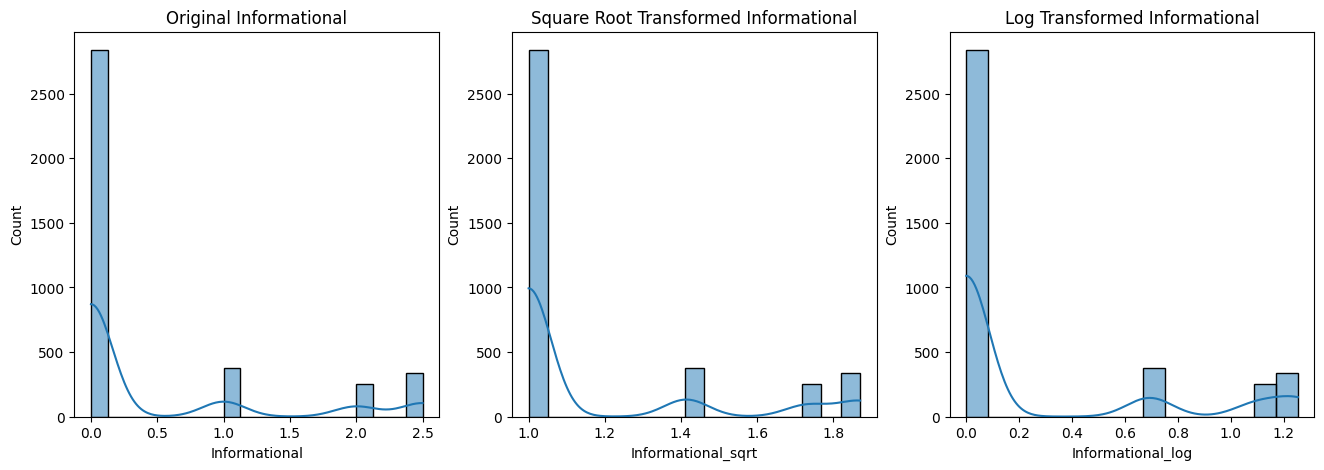

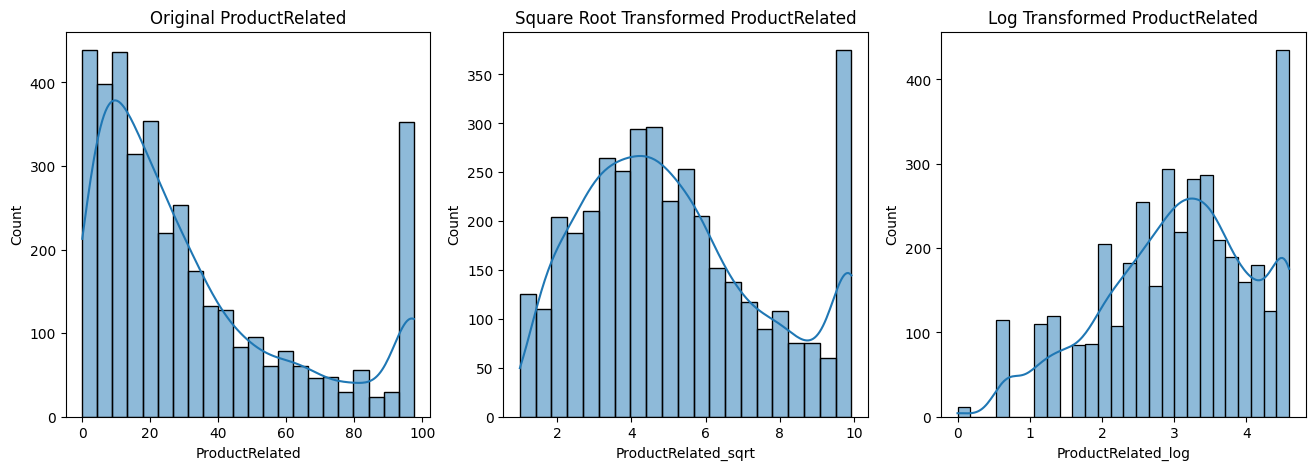

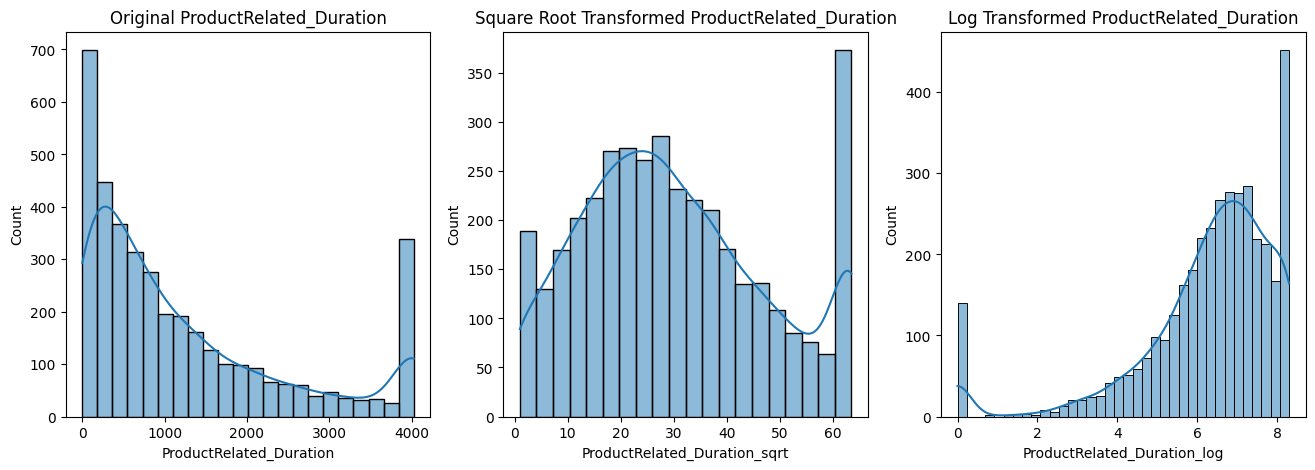

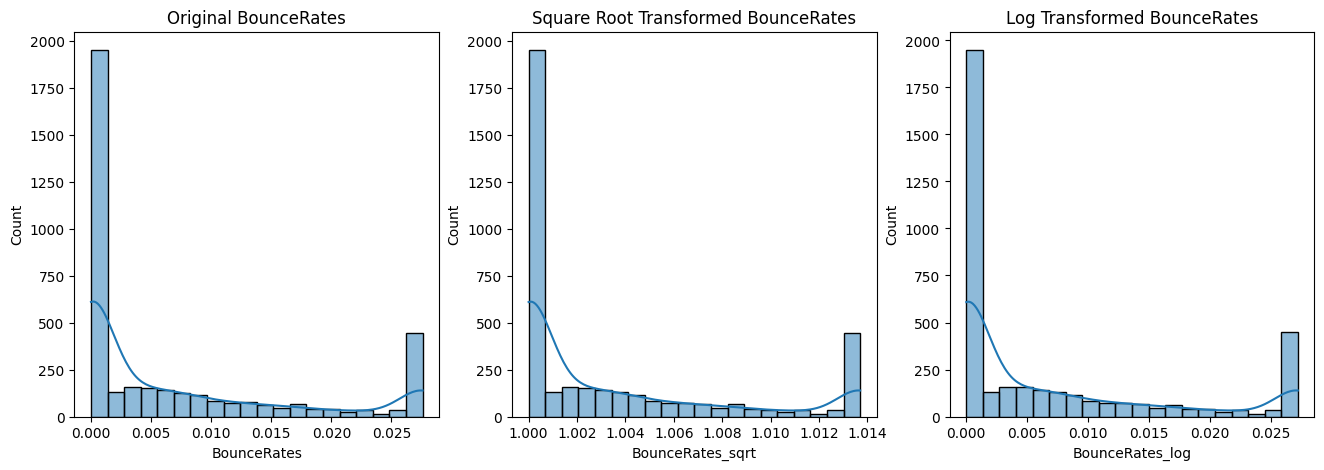

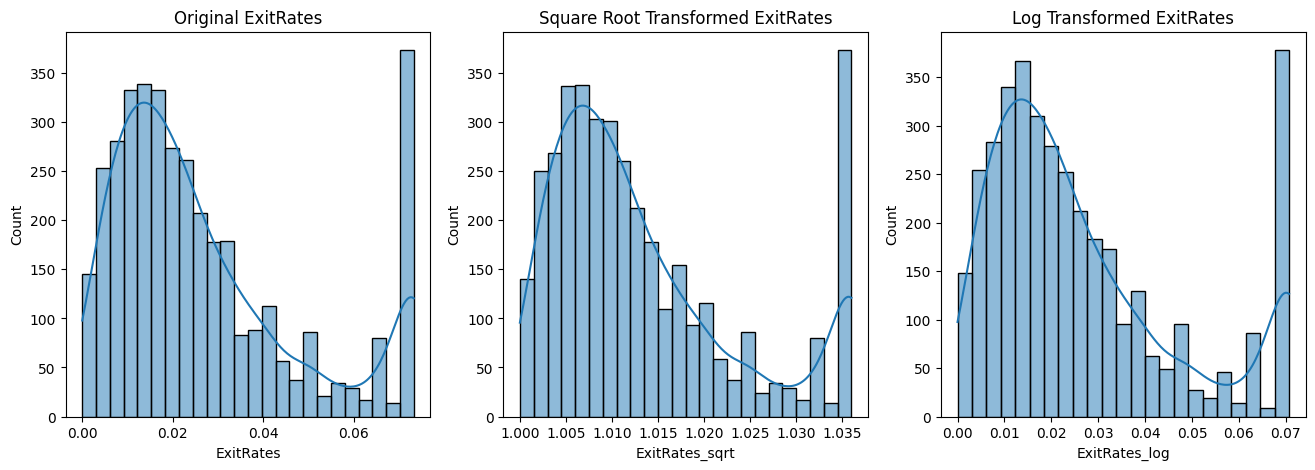

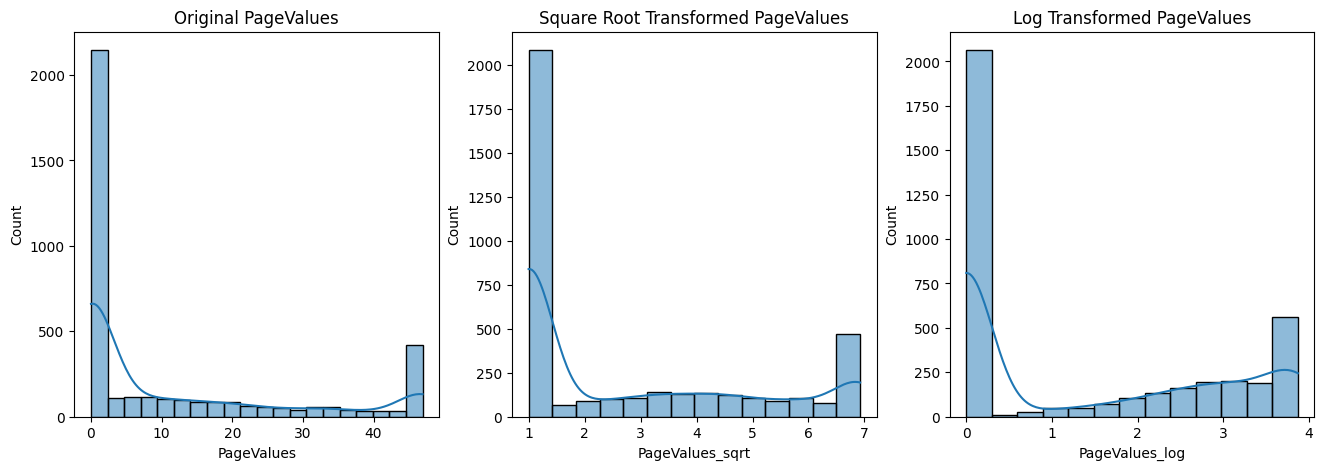

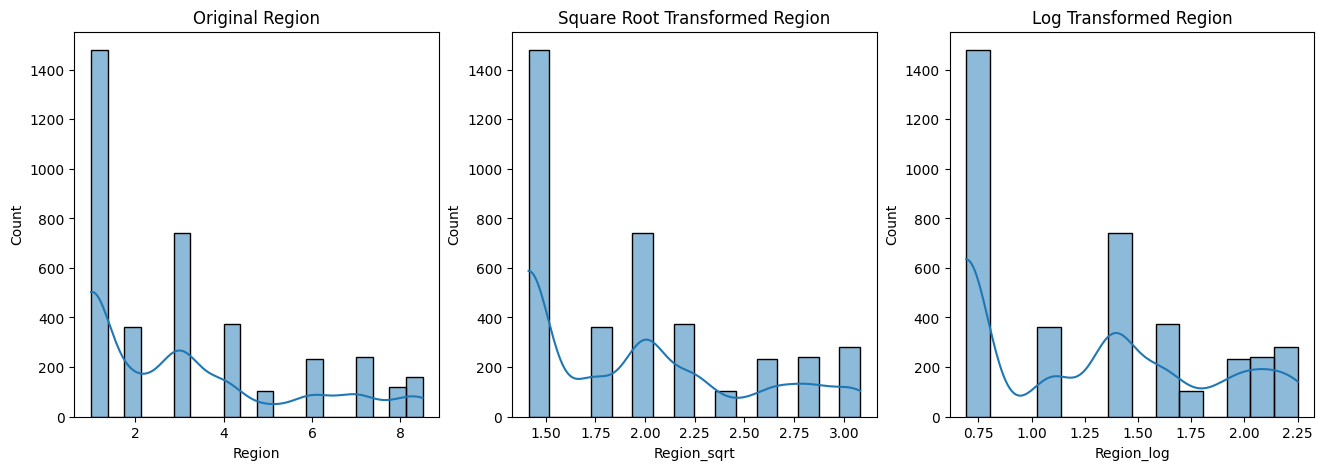

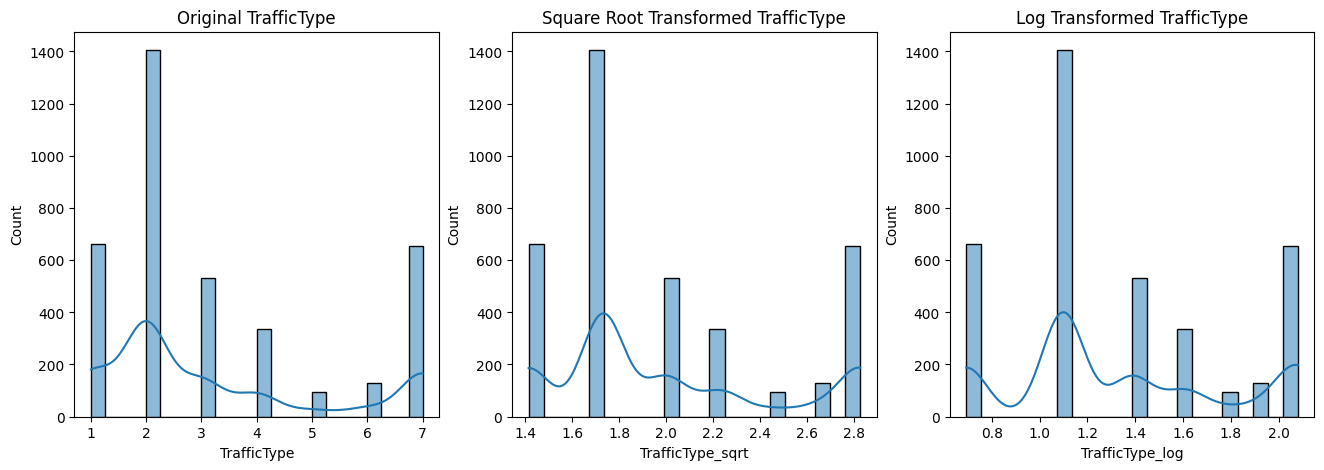

In [35]:
# Visualize original, square root, and log transformations
for feature in numerical_features:
    if skew(df[feature]) > 0.5:
        plt.figure(figsize=(16, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Original {feature}')
        
        plt.subplot(1, 3, 2)
        sns.histplot(transformed_df[feature + '_sqrt'], kde=True)
        plt.title(f'Square Root Transformed {feature}')
        
        plt.subplot(1, 3, 3)
        sns.histplot(transformed_df[feature + '_log'], kde=True)
        plt.title(f'Log Transformed {feature}')

In [36]:
df.shape

(3810, 18)

#### Feature Engineering

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
# Encode categorical features
label_encoder = LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])

# Ensure 'Weekend' and 'Revenue' are encoded as integers
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

# Define features and target
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)


C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3028755109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = label_encoder.fit_transform(df['Month'])
C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3028755109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
C:\Users\hp\AppData\Local\Temp\ipykernel_17380\3028755109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [39]:
df.shape

(3810, 18)

#### Data Splitting

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [41]:
print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (3048, 14)
Testing set shape:  (762, 14)


#### Model Selection

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Random Forest        0.829396   0.834783  0.797784  0.815864   
Gradient Boost       0.820210   0.821839  0.792244  0.806770   
AdaBoost             0.824147   0.849231  0.764543  0.804665   
Logistic Regression  0.790026   0.823151  0.709141  0.761905   
K-Nearest Neighbors  0.741470   0.731638  0.717452  0.724476   

                            Confusion Matrix  
Model-Name                                    
Random Forest         [[344, 57], [73, 288]]  
Gradient Boost        [[339, 62], [75, 286]]  
AdaBoost              [[352, 49], [85, 276]]  
Logistic Regression  [[346, 55], [105, 256]]  
K-Nearest Neighbors  [[306, 95], [102, 259]]  


#### Feature Selection

#### 1. SelectKBest

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=10)
k_best.fit(X, y)
X_k_best = k_best.transform(X)
selected_features_kbest = X.columns[k_best.get_support()]

print("Features selected by SelectKBest:", selected_features_kbest)


Features selected by SelectKBest: Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'VisitorType'],
      dtype='object')


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 3  9 11 12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### Train the models with selected features using SelectKBest

In [47]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Gradient Boost       0.834646   0.830986  0.817175  0.824022   
Random Forest        0.829396   0.813008  0.831025  0.821918   
AdaBoost             0.824147   0.842900  0.772853  0.806358   
Logistic Regression  0.779528   0.791541  0.725762  0.757225   
K-Nearest Neighbors  0.713911   0.698061  0.698061  0.698061   

                             Confusion Matrix  
Model-Name                                     
Gradient Boost         [[341, 60], [66, 295]]  
Random Forest          [[332, 69], [61, 300]]  
AdaBoost               [[349, 52], [82, 279]]  
Logistic Regression    [[332, 69], [99, 262]]  
K-Nearest Neighbors  [[292, 109], [109, 252]]  


- Gradient Boost perform well with a high F1 score, indicating a good balance between precision and recall. It has a relatively low number of false positives and false negatives, making it a reliable model for predictions.
- Random Forest shows consistent performance with good recall, indicating it effectively identifies positive cases. However, its precision is slightly lower than Gradient Boost, leading to a higher number of false positives.
- AdaBoost has the highest precision among the models, indicating it makes fewer false positive predictions. However, its recall is lower, resulting in more false negatives compared to Gradient Boost and Random Forest.
- Logistic Regression shows lower performance compared to the ensemble methods. Its precision and recall are both lower, resulting in a higher number of false negatives, which indicates it misses more positive cases.
- KNN has the lowest performance across all metrics. It struggles with both precision and recall, leading to a high number of false positives and false negatives. 

#### 2. Recursive Feature Elimination (RFE)

In [48]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe.fit(X, y)
X_rfe = rfe.transform(X)
selected_features_rfe = X.columns[rfe.get_support()]

print("Features selected by RFE:", selected_features_rfe)


Features selected by RFE: Index(['Administrative', 'Administrative_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
       'Month', 'Region', 'TrafficType'],
      dtype='object')


#### Train the models with selected features using Recursive Feature Elimination (RFE)

In [49]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metrics
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

# Train and evaluate models using SelectKBest features
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    model_names.append(name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Create a DataFrame from collected metrics
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "Confusion Matrix": conf_matrices
})

# Set the index to 'Model-Name'
models_df = models_df.set_index('Model-Name')

# Sort by 'F1 Score' in descending order
models_df_sorted = models_df.sort_values(by='F1 Score', ascending=False)

print(models_df_sorted)

# Random Forest Feature Importance
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Get indices of the top 10 features

selected_features_rf = X.columns[indices]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                     Accuracy  Precision    Recall  F1 Score  \
Model-Name                                                     
Gradient Boost       0.834646   0.830986  0.817175  0.824022   
Random Forest        0.825459   0.806452  0.831025  0.818554   
AdaBoost             0.824147   0.842900  0.772853  0.806358   
Logistic Regression  0.779528   0.791541  0.725762  0.757225   
K-Nearest Neighbors  0.713911   0.698061  0.698061  0.698061   

                             Confusion Matrix  
Model-Name                                     
Gradient Boost         [[341, 60], [66, 295]]  
Random Forest          [[329, 72], [61, 300]]  
AdaBoost               [[349, 52], [82, 279]]  
Logistic Regression    [[332, 69], [99, 262]]  
K-Nearest Neighbors  [[292, 109], [109, 252]]  


- Gradient Boosting performs the best overall with the highest F1 Score and a balanced precision and recall. It shows a good trade-off between precision and recall, making it a reliable model for predictions.

- Random Forest performs slightly worse than Gradient Boosting but still shows strong overall performance. It has a slightly lower recall and higher number of false negatives, which might indicate it is more conservative in its positive predictions.

- AdaBoost has a high precision but lower recall compared to Gradient Boosting and Random Forest. This suggests that AdaBoost is more cautious in making positive predictions, leading to fewer false positives but more false negatives.

- Logistic Regression shows a good precision but significantly lower recall. It has the highest number of false negatives among the top models, indicating it misses a higher proportion of positive cases.

- KNN has the lowest performance across all metrics. Its lower accuracy, precision, recall, and F1 score indicate that it is less effective in this context. It has the highest number of false positives and false negatives, suggesting it struggles with classification accuracy.

#### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 1.0]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the models with their respective hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boost': (GradientBoostingClassifier(), param_grid_gb),
    'AdaBoost': (AdaBoostClassifier(), param_grid_ada),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Perform hyperparameter tuning for each model
best_models = {}
for name, (model, param_grid) in models.items():
    print(f"Starting GridSearch for {name}")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=10)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Completed GridSearch for {name}")
    
# Print best hyperparameters for each model
for name, model in best_models.items():
    print(f"Best hyperparameters for {name}: {model}")

# Evaluate best models on test set and print accuracy
results = {}
for name, model in best_models.items():
    accuracy = model.score(X_test, y_test)
    results[name] = accuracy
    print(f"Test accuracy for {name}: {accuracy}")


Starting GridSearch for Logistic Regression
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START C=0.001, max_iter=100......................................
[CV 1/3; 1/18] END .......C=0.001, max_iter=100;, score=0.811 total time=   0.0s
[CV 2/3; 1/18] START C=0.001, max_iter=100......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 1/18] END .......C=0.001, max_iter=100;, score=0.816 total time=   0.0s
[CV 3/3; 1/18] START C=0.001, max_iter=100......................................
[CV 3/3; 1/18] END .......C=0.001, max_iter=100;, score=0.825 total time=   0.0s
[CV 1/3; 2/18] START C=0.001, max_iter=200......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3; 2/18] END .......C=0.001, max_iter=200;, score=0.815 total time=   0.1s
[CV 2/3; 2/18] START C=0.001, max_iter=200......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 2/18] END .......C=0.001, max_iter=200;, score=0.811 total time=   0.1s
[CV 3/3; 2/18] START C=0.001, max_iter=200......................................
[CV 3/3; 2/18] END .......C=0.001, max_iter=200;, score=0.846 total time=   0.1s
[CV 1/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 3/18] END .......C=0.001, max_iter=300;, score=0.816 total time=   0.2s
[CV 2/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 3/18] END .......C=0.001, max_iter=300;, score=0.811 total time=   0.2s
[CV 3/3; 3/18] START C=0.001, max_iter=300......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 3/18] END .......C=0.001, max_iter=300;, score=0.846 total time=   0.1s
[CV 1/3; 4/18] START C=0.01, max_iter=100.......................................
[CV 1/3; 4/18] END ........C=0.01, max_iter=100;, score=0.807 total time=   0.0s
[CV 2/3; 4/18] START C=0.01, max_iter=100.......................................
[CV 2/3; 4/18] END ........C=0.01, max_iter=100;, score=0.813 total time=   0.0s
[CV 3/3; 4/18] START C=0.01, max_iter=100.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 4/18] END ........C=0.01, max_iter=100;, score=0.834 total time=   0.0s
[CV 1/3; 5/18] START C=0.01, max_iter=200.......................................
[CV 1/3; 5/18] END ........C=0.01, max_iter=200;, score=0.804 total time=   0.1s
[CV 2/3; 5/18] START C=0.01, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 5/18] END ........C=0.01, max_iter=200;, score=0.823 total time=   0.1s
[CV 3/3; 5/18] START C=0.01, max_iter=200.......................................
[CV 3/3; 5/18] END ........C=0.01, max_iter=200;, score=0.844 total time=   0.1s
[CV 1/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 6/18] END ........C=0.01, max_iter=300;, score=0.808 total time=   0.1s
[CV 2/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 6/18] END ........C=0.01, max_iter=300;, score=0.814 total time=   0.1s
[CV 3/3; 6/18] START C=0.01, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 6/18] END ........C=0.01, max_iter=300;, score=0.842 total time=   0.2s
[CV 1/3; 7/18] START C=0.1, max_iter=100........................................
[CV 1/3; 7/18] END .........C=0.1, max_iter=100;, score=0.789 total time=   0.0s
[CV 2/3; 7/18] START C=0.1, max_iter=100........................................
[CV 2/3; 7/18] END .........C=0.1, max_iter=100;, score=0.799 total time=   0.0s
[CV 3/3; 7/18] START C=0.1, max_iter=100........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 7/18] END .........C=0.1, max_iter=100;, score=0.838 total time=   0.0s
[CV 1/3; 8/18] START C=0.1, max_iter=200........................................
[CV 1/3; 8/18] END .........C=0.1, max_iter=200;, score=0.806 total time=   0.1s
[CV 2/3; 8/18] START C=0.1, max_iter=200........................................
[CV 2/3; 8/18] END .........C=0.1, max_iter=200;, score=0.811 total time=   0.1s
[CV 3/3; 8/18] START C=0.1, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 8/18] END .........C=0.1, max_iter=200;, score=0.844 total time=   0.0s
[CV 1/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 9/18] END .........C=0.1, max_iter=300;, score=0.801 total time=   0.2s
[CV 2/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 9/18] END .........C=0.1, max_iter=300;, score=0.816 total time=   0.1s
[CV 3/3; 9/18] START C=0.1, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 9/18] END .........C=0.1, max_iter=300;, score=0.842 total time=   0.2s
[CV 1/3; 10/18] START C=1, max_iter=100.........................................
[CV 1/3; 10/18] END ..........C=1, max_iter=100;, score=0.794 total time=   0.0s
[CV 2/3; 10/18] START C=1, max_iter=100.........................................
[CV 2/3; 10/18] END ..........C=1, max_iter=100;, score=0.806 total time=   0.0s
[CV 3/3; 10/18] START C=1, max_iter=100.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 10/18] END ..........C=1, max_iter=100;, score=0.832 total time=   0.0s
[CV 1/3; 11/18] START C=1, max_iter=200.........................................
[CV 1/3; 11/18] END ..........C=1, max_iter=200;, score=0.796 total time=   0.1s
[CV 2/3; 11/18] START C=1, max_iter=200.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 11/18] END ..........C=1, max_iter=200;, score=0.814 total time=   0.1s
[CV 3/3; 11/18] START C=1, max_iter=200.........................................
[CV 3/3; 11/18] END ..........C=1, max_iter=200;, score=0.833 total time=   0.0s
[CV 1/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 12/18] END ..........C=1, max_iter=300;, score=0.811 total time=   0.1s
[CV 2/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 12/18] END ..........C=1, max_iter=300;, score=0.811 total time=   0.2s
[CV 3/3; 12/18] START C=1, max_iter=300.........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 12/18] END ..........C=1, max_iter=300;, score=0.841 total time=   0.1s
[CV 1/3; 13/18] START C=10, max_iter=100........................................
[CV 1/3; 13/18] END .........C=10, max_iter=100;, score=0.797 total time=   0.0s
[CV 2/3; 13/18] START C=10, max_iter=100........................................
[CV 2/3; 13/18] END .........C=10, max_iter=100;, score=0.803 total time=   0.0s
[CV 3/3; 13/18] START C=10, max_iter=100........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 3/3; 13/18] END .........C=10, max_iter=100;, score=0.830 total time=   0.0s
[CV 1/3; 14/18] START C=10, max_iter=200........................................
[CV 1/3; 14/18] END .........C=10, max_iter=200;, score=0.802 total time=   0.1s
[CV 2/3; 14/18] START C=10, max_iter=200........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 14/18] END .........C=10, max_iter=200;, score=0.811 total time=   0.1s
[CV 3/3; 14/18] START C=10, max_iter=200........................................
[CV 3/3; 14/18] END .........C=10, max_iter=200;, score=0.836 total time=   0.0s
[CV 1/3; 15/18] START C=10, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 15/18] END .........C=10, max_iter=300;, score=0.807 total time=   0.2s
[CV 2/3; 15/18] START C=10, max_iter=300........................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 2/3; 15/18] END .........C=10, max_iter=300;, score=0.817 total time=   0.1s
[CV 3/3; 15/18] START C=10, max_iter=300........................................
[CV 3/3; 15/18] END .........C=10, max_iter=300;, score=0.843 total time=   0.1s
[CV 1/3; 16/18] START C=100, max_iter=100.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3; 16/18] END ........C=100, max_iter=100;, score=0.793 total time=   0.0s
[CV 2/3; 16/18] START C=100, max_iter=100.......................................
[CV 2/3; 16/18] END ........C=100, max_iter=100;, score=0.803 total time=   0.0s
[CV 3/3; 16/18] START C=100, max_iter=100.......................................
[CV 3/3; 16/18] END ........C=100, max_iter=100;, score=0.834 total time=   0.0s
[CV 1/3; 17/18] START C=100, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[CV 1/3; 17/18] END ........C=100, max_iter=200;, score=0.805 total time=   0.1s
[CV 2/3; 17/18] START C=100, max_iter=200.......................................
[CV 2/3; 17/18] END ........C=100, max_iter=200;, score=0.811 total time=   0.1s
[CV 3/3; 17/18] START C=100, max_iter=200.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 17/18] END ........C=100, max_iter=200;, score=0.838 total time=   0.0s
[CV 1/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3; 18/18] END ........C=100, max_iter=300;, score=0.806 total time=   0.1s
[CV 2/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3; 18/18] END ........C=100, max_iter=300;, score=0.809 total time=   0.2s
[CV 3/3; 18/18] START C=100, max_iter=300.......................................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3; 18/18] END ........C=100, max_iter=300;, score=0.843 total time=   0.2s


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed GridSearch for Logistic Regression
Starting GridSearch for Random Forest
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 2/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.852 total time=   0.2s
[CV 3/3; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/3; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.865 total time=   0.2s
[CV 1/3; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/3; 2/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.835 total time=   0.2s
[CV 2/3; 1/12] START learning_rate=0.01, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.856 total time=   0.2s
[CV 3/3; 1/12] START learning_rate=0.01, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 1/12] END learning_rate=0.01, n_estimators=50;, score=0.864 total time=   0.3s
[CV 1/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.835 total time=   0.5s
[CV 2/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.856 total time=   0.5s
[CV 3/3; 2/12] START learning_rate=0.01, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 2/12] END learning_rate=0.01, n_estimators=100;, score=0.864 total time=   0.5s
[CV 1/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.835 total time=   1.2s
[CV 2/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.856 total time=   1.2s
[CV 3/3; 3/12] START learning_rate=0.01, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 3/12] END learning_rate=0.01, n_estimators=200;, score=0.865 total time=   1.1s
[CV 1/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.833 total time=   0.2s
[CV 2/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.857 total time=   0.2s
[CV 3/3; 4/12] START learning_rate=0.1, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 4/12] END learning_rate=0.1, n_estimators=50;, score=0.864 total time=   0.2s
[CV 1/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.833 total time=   0.6s
[CV 2/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.856 total time=   0.5s
[CV 3/3; 5/12] START learning_rate=0.1, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 5/12] END learning_rate=0.1, n_estimators=100;, score=0.865 total time=   0.5s
[CV 1/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.832 total time=   1.2s
[CV 2/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.853 total time=   1.2s
[CV 3/3; 6/12] START learning_rate=0.1, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 6/12] END learning_rate=0.1, n_estimators=200;, score=0.859 total time=   1.2s
[CV 1/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.833 total time=   0.2s
[CV 2/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.856 total time=   0.2s
[CV 3/3; 7/12] START learning_rate=0.2, n_estimators=50.........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 7/12] END learning_rate=0.2, n_estimators=50;, score=0.865 total time=   0.2s
[CV 1/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.832 total time=   0.5s
[CV 2/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.853 total time=   0.5s
[CV 3/3; 8/12] START learning_rate=0.2, n_estimators=100........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 8/12] END learning_rate=0.2, n_estimators=100;, score=0.857 total time=   0.5s
[CV 1/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.834 total time=   1.1s
[CV 2/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.853 total time=   1.2s
[CV 3/3; 9/12] START learning_rate=0.2, n_estimators=200........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 9/12] END learning_rate=0.2, n_estimators=200;, score=0.855 total time=   1.1s
[CV 1/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.835 total time=   0.2s
[CV 2/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.850 total time=   0.2s
[CV 3/3; 10/12] START learning_rate=1.0, n_estimators=50........................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 10/12] END learning_rate=1.0, n_estimators=50;, score=0.849 total time=   0.2s
[CV 1/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.836 total time=   0.6s
[CV 2/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.844 total time=   0.5s
[CV 3/3; 11/12] START learning_rate=1.0, n_estimators=100.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 11/12] END learning_rate=1.0, n_estimators=100;, score=0.851 total time=   0.6s
[CV 1/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 1/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.823 total time=   1.1s
[CV 2/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 2/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.845 total time=   1.1s
[CV 3/3; 12/12] START learning_rate=1.0, n_estimators=200.......................


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV 3/3; 12/12] END learning_rate=1.0, n_estimators=200;, score=0.847 total time=   1.0s


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Completed GridSearch for AdaBoost
Starting GridSearch for K-Nearest Neighbors
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 1/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.701 total time=   0.0s
[CV 2/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 2/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.724 total time=   0.0s
[CV 3/3; 1/16] START metric=euclidean, n_neighbors=3, weights=uniform...........
[CV 3/3; 1/16] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.744 total time=   0.0s
[CV 1/3; 2/16] START metric=euclidean, n_neighbors=3, weights=distance..........
[CV 1/3; 2/16] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.704 total time=   0.0s
[CV 2/3; 2/16] START metric=euclidean, n_neighbors=3, weights=distance..........
[CV 2/3; 2/16] END metric=euclidean, n_neighbors=3,

In [51]:
# Create a DataFrame to store results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy'])
results_df.index.name = 'Model'

print("\nResults:")
print(results_df)


Results:
                     Test Accuracy
Model                             
Logistic Regression       0.800525
Random Forest             0.822835
Gradient Boost            0.834646
AdaBoost                  0.821522
K-Nearest Neighbors       0.728346


- Gradient Boost is the best model with the highest test accuracy, making it the most reliable for new data.
- Random Forest is a close second, also performing well and a good alternative to Gradient Boost.
- AdaBoost performs decently but isn't as accurate as the top two models.
- Logistic Regression has moderate accuracy and improved with tuning but is still behind the ensemble methods.
- K-Nearest Neighbors is the worst performer, showing the lowest accuracy even after tuning.